# Seguridad en Colombia

Estadística de la situación en Colombia en materia de seguridad e integridad personal en la última década, por parte de Luis Ángel Motta Valero como proyecto final para la asignatura Python para la inteligencia artificial, año 2023.

## Contextualización.
El Índice Global de Paz ("Global Peace Index" - GPI) mide el grado de seguridad de cada país a nivel global entre Muy Alto - Alto - Medio - Bajo - Muy Bajo. De acuerdo con los resultados del GPI para el año 2022, entre los 163 países que componen el ranking, Colombia se posicionó en el 144º lugar con un nivel Bajo de seguridad y un Score de 2729, tan solo 7 puestos por encima de los países con nivel Muy Bajo y empeorando respecto al 2021, año en que alcanzó 2694 puntos, pero se mantuvo en la misma posición. 

Por otra parte, en virtud de conocer el contexto referente a los delitos reportados en Colombia, el Ministerio de Defensa Nacional y la Dirección General de la Policía Nacional presentan su primera edición del Libro Blanco de las Estadísticas del Sector Seguridad y Defensa. En el apartado PROTECCIÓN DE LA VIDA Y LA INTEGRIDAD PERSONAL reúne los diferentes tipos de delitos relacionados con el tema de homicidio y lesiones personales, definidos estos grandes grupos de la siguientes manera:

- Homicidio: Es toda muerte que fuere causada por otra persona por cualquier tipo de elemento, a excepción de aquellas muertes ocurridas en accidentes de tránsito.
- Lesiones personales: Es toda acción donde una persona causa algún tipo de daño o lesión a otra, a excepción de aquellas lesiones ocurridas en accidentes de tránsito.

Se toma en consideración también los reportes denominados como "homicidio colectivo", entendidos como aquellos hechos en los cuales resultan muertos cuatro (4) o más personas en estado de indefensión en el mismo lugar, a la misma hora y por los mismos autores; no se contabilizan aquellos casos en donde las personas pertenecían a los grupos subversivos, bandas criminales, delincuencia organizada y común o si eran parte de la Fuerza Pública. 

Adicionalmente, el Código Penal de Colombia (Ley 599 del 2000), en el Libro Segundo: DE LOS DELITOS EN PARTICULAR - Título I: DELITOS CONTRA LA VIDA Y LA INTEGRIDAD PERSONAL, incluye el homicidio y lesiones personales entre estos delitos.

## Objetivo. 
Realizar un analisis estadístico de la situación vivida por los habitantes del territorio colombiano en la última década en temas de seguridad e integridad personal frente a los delitos de homicidio y lesiones personales.
## Metodología.
Se realiza una búsqueda de los casos reportados en las diferentes entidades públicas al servicio de la seguridad de la sociedad residente en Colombia para la posterior extracción de los datos encontrados, los cuales son publicados por la Fiscalía General de la Nación y el Ministerio de Defensa Nacional. La Dirección General de la Policía Nacional publica en su portal web los reportes asociados a los mismos casos; sin embargo, al no aportar algo adicional a las fuentes anteriores, no se tomará para el estudio. Seguidamente, se revisan y preparan los conjuntos de datos recopilados para su posterior visualización y análisis.

### Base de datos. 

Aunque los datos en materia de seguridad implica distintos factores y causas de afección, se tomará aquellos que atentan contra la vida y bienestar de la víctima: homicidio, hurto a personas y lesiones personales. Las bases de datos que registran estos temas de seguridad y defensa se obtienen de los siguientes enlaces. 
- Fiscalía General de la Nación: https://www.datos.gov.co/Justicia-y-Derecho/Conteo-de-V-ctimas/sft7-9im5

    Distribución de delitos comprendidos entre el año 2010 a abril del 2023 por cada departamento y municipio, cuyas víctimas son registrados por grupos de edades y género (sexo).

- Ministerio de Defensa Nacional:
  - Homicidio Colectivo: https://www.datos.gov.co/Seguridad-y-Defensa/HOMICIDIO-COLECTIVO-V-CTIMAS/3vft-pewx
  - Homicidio: https://www.datos.gov.co/Seguridad-y-Defensa/HOMICIDIO/m8fd-ahd9
  - Lesiones Personales: https://www.datos.gov.co/dataset/LESIONES-PERSONALES/jr6v-i33g

  Distribución de delitos comprendidos entre el año 2003 a abril del 2023 por cada departamento y municipio, cuyas víctimas son registradas por zona y/o género (sexo).

Inicialmente, se hace un análisis a nivel nacional por cada año entre los dos delitos mencionados, para concluir con un analisis departamental sobre el año más representativo, específicamente, el año en que se presentó la mayor cantidad de víctimas.

## Hipótesis.

Tomando como base lo expuesto en los diferentes canales de noticias y medios de comunicación masiva, se intuye que en Colombia:
- Se presentan en mayor grado homicidios a mujeres jóvenes. 
- Las lesiones personales más frecuentes son a adolescentes y adultos mayores de 60 años. 
- Estos homicidios se presentan con mayor relevancia en la zona urbana, dentro de las principales ciudades como Bogotá (capital del departamento de Cundinamarca y capital del país) y Medellín (capital del departamento de Antioquia).

Se trabajará cada fuente por separado, iniciando con la base de datos de la Fiscalía General de la Nación.
## Fiscalía General de la Nación

### Preparación de los datos.
A continuación se presenta la preparación de los datos.

In [1]:
# Importe de las librerías necesarias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Cargue y asignación del fichero en una variable
vict = pd.read_csv('./data/Conteo_de_V_ctimas.csv', sep=',')

In [3]:
# Conocer las diferentes columnas que componen la base de datos
vict.columns

Index(['HECHO', 'RUPTURA', 'CONEXO', 'ESTADO_NOTICIA', 'ETAPA',
       'ANIO_DENUNCIA', 'ANIO_ENTRADA', 'ANIO_HECHO', 'LEY', 'PAIS',
       'DEPARTAMENTO', 'MUNICIPIO', 'SECCIONAL', 'GRUPO_DELITO', 'DELITO',
       'IMPUTACION', 'CONDENA', 'ATIPICIDAD_INEXISTENCIA', 'ACUSACION',
       'CAPTURA', 'SEXO_VICTIMA', 'GRUPO_EDAD_VICTIMA', 'PAIS_NACIMIENTO',
       'HOMICIDIO_DOLOSO_CONSUMADO', 'TOTAL_VICTIMAS'],
      dtype='object')

In [4]:
# Observar los delitos incluidos en los registros
vict['GRUPO_DELITO'].unique()

array(['LESIONES PERSONALES', 'HURTO', 'FE PUBLICA',
       'VIOLENCIA INTRAFAMILIAR', 'AMENAZAS', 'DELITOS SEXUALES',
       'CONTRA LA FAMILIA', 'DELITOS INFORMATICOS', 'HOMICIDIO DOLOSO',
       'IMPARTICION DE JUSTICIA', 'LESIONES PERSONALES CULPOSAS',
       'FABRICACION, TRAFICO Y PORTE DE ARMAS', 'INJURIA Y CALUMNIA',
       'ESTAFA', 'CONSTRENIMIENTO', 'DESPLAZAMIENTO',
       'PATRIMONIO ECONOMICO', 'RECLUTAMIENTO ILICITO',
       'FALSEDAD EN DOCUMENTO', 'ORDEN ECONOMICO SOCIAL',
       'ADMINISTRACION PUBLICA', 'CORRUPCION ADMINISTRATIVA',
       'CORRUPCION ELECTORAL', 'HOMICIDIO CULPOSO',
       'CORRUPCION TRIBUTARIA', 'FEMINICIDIO', 'SEGURIDAD PUBLICA',
       'EXTORSION', 'DESAPARICION FORZADA', 'VIDA E INTEGRIDAD PERSONAL',
       'CONCIERTO PARA DELINQUIR', 'CORRUPCION JUDICIAL',
       'SECUESTRO SIMPLE', 'ESTUPEFACIENTES', 'ACTOS DE DISCRIMINACION',
       'LIBERTAD INDIVIDUAL Y OTRAS GARANTIAS', 'USO DE MENORES DE EDAD',
       'PERSONAS Y BIENES PROTEGIDOS POR EL 

In [5]:
# Tomar las columnas y filas necesarias
vict_datos = vict[['ANIO_HECHO','DEPARTAMENTO',
       'MUNICIPIO','GRUPO_DELITO','SEXO_VICTIMA', 'GRUPO_EDAD_VICTIMA','TOTAL_VICTIMAS']]
# Se filtran los delitos que nos interesan
delitos_vict = (vict_datos['GRUPO_DELITO'] == 'HOMICIDIO DOLOSO') | (vict_datos['GRUPO_DELITO'] == 'HOMICIDIO CULPOSO') | (vict_datos['GRUPO_DELITO'] == 'LESIONES PERSONALES')
vict_datos = vict_datos.loc[delitos_vict]

# Ordenar por año en que ocurrió el hecho delictivo
vict_datos.sort_values(by='ANIO_HECHO', ascending=True, inplace=True)

display(vict_datos.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 628112 entries, 3746797 to 1497236
Data columns (total 7 columns):
 #   Column              Non-Null Count   Dtype 
---  ------              --------------   ----- 
 0   ANIO_HECHO          628112 non-null  int64 
 1   DEPARTAMENTO        628112 non-null  object
 2   MUNICIPIO           628112 non-null  object
 3   GRUPO_DELITO        628112 non-null  object
 4   SEXO_VICTIMA        588489 non-null  object
 5   GRUPO_EDAD_VICTIMA  628112 non-null  object
 6   TOTAL_VICTIMAS      628112 non-null  int64 
dtypes: int64(2), object(5)
memory usage: 38.3+ MB


None

In [6]:
# El dataframe a trabajar es el siguiente
display(vict_datos.head())

,ANIO_HECHO,DEPARTAMENTO,MUNICIPIO,GRUPO_DELITO,SEXO_VICTIMA,GRUPO_EDAD_VICTIMA,TOTAL_VICTIMAS
3746797,2010,Huila,NEIVA,LESIONES PERSONALES,MASCULINO,SIN DATO,3
1575190,2010,Tolima,CHAPARRAL,LESIONES PERSONALES,MASCULINO,SIN DATO,1
2834649,2010,Tolima,GUAMO,LESIONES PERSONALES,FEMENINO,ADULTEZ 29 - 59,6
3318189,2010,Antioquia,SAN CARLOS,LESIONES PERSONALES,FEMENINO,SIN DATO,1
2380555,2010,Tolima,CHAPARRAL,HOMICIDIO DOLOSO,MASCULINO,ADOLESCENTE 14 - 17,2


In [9]:
# Datos únicos por cada columna
nombre_col = vict_datos.columns
for column in nombre_col[:-1]: # Se omite la columna TOTAL_VICTIMAS
    print(f'>> {column}\n')
    print(vict_datos[column].unique(), end='\n\n')

>> ANIO_HECHO

[2010 2011 2012 2013 2014 2015 2016 2017 2018 2019 2020 2021 2022 2023]

>> DEPARTAMENTO

['Huila' 'Tolima' 'Antioquia' 'Caquetá' 'Norte de Santander' 'Magdalena'
 'Meta' 'Valle del Cauca' 'Santander' 'Cundinamarca' 'Nariño' 'Quindío'
 'Cesar' 'Sucre' 'Caldas' 'Bolívar' 'Casanare' 'Chocó' 'Boyaca' 'Cauca'
 'Córdoba' 'BOGOTÁ, D. C.' 'La Guajira' 'Arauca' 'Risaralda' 'Guaviare'
 'Atlántico' 'Putumayo'
 'Archipiélago de San Andrés, Providencia y Santa Catalina' 'Vaupés'
 'Guainía' 'Amazonas' 'Vichada']

>> MUNICIPIO

['NEIVA' 'CHAPARRAL' 'GUAMO' ... 'UBATÉ' 'PACOA' 'MORICHAL']

>> GRUPO_DELITO

['LESIONES PERSONALES' 'HOMICIDIO DOLOSO' 'HOMICIDIO CULPOSO']

>> SEXO_VICTIMA

['MASCULINO' 'FEMENINO' nan]

>> GRUPO_EDAD_VICTIMA

['SIN DATO' 'ADULTEZ 29 - 59' 'ADOLESCENTE 14 - 17' 'JUVENTUD 18 - 28'
 'ADULTO MAYOR DE 60' 'PRIMERA INFANCIA 0 - 5' 'PRE-ADOLESCENTE 12 - 13'
 'INFANCIA 6 - 11']



**Modificaciones:** 
- Se removerá los intervalos de edades en la columna 'GRUPO_EDAD_VICTIMA'.
- Se renombra la columna 'TOTAL_VICTIMAS' para mayor congruencia con los datasets de la otra fuente.
- Los elementos de las columnas categóricas están en mayúsculas a excepción de 'DEPARTAMENTOS'; se aplicará uppercase a dicha columna.

In [10]:
# Remover los intervalos de edades en la columna 'GRUPO_EDAD'
def remove_edades(title):
    try:
        index = title.index(' - ')
        return title[:index-2].strip()
    except: return title[:]


vict_datos['GRUPO_EDAD_VICTIMA'] = vict_datos['GRUPO_EDAD_VICTIMA'].apply(remove_edades)
vict_datos.rename(columns={'TOTAL_VICTIMAS':'CANTIDAD'},inplace=True)
vict_datos['DEPARTAMENTO'] = vict_datos['DEPARTAMENTO'].str.upper()
display(vict_datos.head())

,ANIO_HECHO,DEPARTAMENTO,MUNICIPIO,GRUPO_DELITO,SEXO_VICTIMA,GRUPO_EDAD_VICTIMA,CANTIDAD
3746797,2010,HUILA,NEIVA,LESIONES PERSONALES,MASCULINO,SIN DATO,3
1575190,2010,TOLIMA,CHAPARRAL,LESIONES PERSONALES,MASCULINO,SIN DATO,1
2834649,2010,TOLIMA,GUAMO,LESIONES PERSONALES,FEMENINO,ADULTEZ,6
3318189,2010,ANTIOQUIA,SAN CARLOS,LESIONES PERSONALES,FEMENINO,SIN DATO,1
2380555,2010,TOLIMA,CHAPARRAL,HOMICIDIO DOLOSO,MASCULINO,ADOLESCENTE,2


In [11]:
print(vict_datos['GRUPO_EDAD_VICTIMA'].unique())
print(vict_datos['DEPARTAMENTO'].unique())

['SIN DATO' 'ADULTEZ' 'ADOLESCENTE' 'JUVENTUD' 'ADULTO MAYOR DE 60'
 'PRIMERA INFANCIA' 'PRE-ADOLESCENTE' 'INFANCIA']
['HUILA' 'TOLIMA' 'ANTIOQUIA' 'CAQUETÁ' 'NORTE DE SANTANDER' 'MAGDALENA'
 'META' 'VALLE DEL CAUCA' 'SANTANDER' 'CUNDINAMARCA' 'NARIÑO' 'QUINDÍO'
 'CESAR' 'SUCRE' 'CALDAS' 'BOLÍVAR' 'CASANARE' 'CHOCÓ' 'BOYACA' 'CAUCA'
 'CÓRDOBA' 'BOGOTÁ, D. C.' 'LA GUAJIRA' 'ARAUCA' 'RISARALDA' 'GUAVIARE'
 'ATLÁNTICO' 'PUTUMAYO'
 'ARCHIPIÉLAGO DE SAN ANDRÉS, PROVIDENCIA Y SANTA CATALINA' 'VAUPÉS'
 'GUAINÍA' 'AMAZONAS' 'VICHADA']


Entre los valores únicos por cada columna se observó que existen datos sin registro de sexo y grupo de edades.

In [ ]:
# Reportes sin registro de grupo de edades
sin_edad = vict_datos['GRUPO_EDAD_VICTIMA'] == 'SIN DATO'
na_edad = len(vict_datos[sin_edad])
# Reportes sin registro de sexo
sin_sexo = vict_datos['SEXO_VICTIMA'].isna() 
na_sexo = sin_sexo.sum()
# Reportes sin registro de sexo y grupo de edades
sin_edad_sexo = sin_edad & sin_sexo
na_edad_sexo = len(vict_datos[sin_edad_sexo])

print("Tras la revisión se concluye:")
print(f"- Existen {na_edad} datos sin un registro correspondiente al grupo de edad.")
print(f"- Existen {na_sexo} datos sin un registro correspondiente al género/sexo.")
print(f"- Existen {na_edad_sexo} datos sin un registro correspondiente al género/sexo ni grupo edad.")
print()
print("Lo anterior corresponde al siguiente porcentaje:")
print(f"- Grupo Edad: {round(100*na_edad/len(vict_datos), 2)}%")
print(f"- Sexo: {round(100*na_sexo/len(vict_datos), 2)}%")
print(f"- Sexo/Grupo Edad: {round(100*na_edad_sexo/len(vict_datos), 2)}%")

Tras la revisión se concluye:
- Existen 190729 datos sin un registro correspondiente al grupo de edad.
- Existen 39623 datos sin un registro correspondiente al género/sexo.
- Existen 28182 datos sin un registro correspondiente al género/sexo ni grupo edad.

Lo anterior corresponde al siguiente porcentaje:
- Grupo Edad: 30.37%
- Sexo: 6.31%
- Sexo/Grupo Edad: 4.49%


Conociendo el número de datos perdidos, en el análisis no se considerarán aquellos reportes sin sexo registrado, ya que representan menos del 10% de la población. 

In [13]:
# Habiendo preparado los datos generales, se agrupa para el análisis a nivel nacional.
vict_nacional = vict_datos.drop(columns=['DEPARTAMENTO', 'MUNICIPIO'])
vict_nacional = vict_nacional.groupby(by=['GRUPO_DELITO','ANIO_HECHO','GRUPO_EDAD_VICTIMA','SEXO_VICTIMA'], as_index=False, dropna=True).sum()

# Se toma como índice las dos columnas que se necesitan como tal.
vict_nacional.set_index(['GRUPO_DELITO','ANIO_HECHO'],inplace=True)

In [14]:
# Separación en diferentes dataframe para cada delito (por ello se tomó la respectiva columna como índice).
vict_nacional_homCulp = vict_nacional.loc['HOMICIDIO CULPOSO']
vict_nacional_homDolo = vict_nacional.loc['HOMICIDIO DOLOSO']
vict_nacional_lesiones = vict_nacional.loc['LESIONES PERSONALES']

# Los dataframe resultantes difieren solo en los valores de la columna 'CANTIDAD', 
# por ello se toma como referencia uno de los dataframe.
display(vict_nacional_homCulp)
print(f"Cada dataframe tiene {len(vict_nacional_homCulp)} filas")

,GRUPO_EDAD_VICTIMA,SEXO_VICTIMA,CANTIDAD
ANIO_HECHO,,,
2010,ADOLESCENTE,FEMENINO,55
2010,ADOLESCENTE,MASCULINO,132
2010,ADULTEZ,FEMENINO,389
2010,ADULTEZ,MASCULINO,1401
2010,ADULTO MAYOR DE 60,FEMENINO,191
...,...,...,...
2023,PRE-ADOLESCENTE,MASCULINO,15
2023,PRIMERA INFANCIA,FEMENINO,25
2023,PRIMERA INFANCIA,MASCULINO,58


Cada dataframe tiene 224 filas


In [15]:
# Estadística descriptiva de cada grupo de delito
delitos = [vict_nacional_homCulp, vict_nacional_homDolo, vict_nacional_lesiones]
titles = ['HOMICIDIO CULPOSO','HOMICIDIO DOLOSO','LESIONES PERSONALES']
for i, delito in enumerate(delitos):
    print(titles[i])
    display(delito.describe().T)

HOMICIDIO CULPOSO


,count,mean,std,min,25%,50%,75%,max
CANTIDAD,224.0,586.991071,874.395489,4.0,67.0,207.0,785.0,6505.0


HOMICIDIO DOLOSO


,count,mean,std,min,25%,50%,75%,max
CANTIDAD,224.0,2015.433036,3132.576469,20.0,151.75,561.0,1685.0,12691.0


LESIONES PERSONALES


,count,mean,std,min,25%,50%,75%,max
CANTIDAD,224.0,5568.575893,6334.494069,92.0,531.25,2111.0,10890.25,25713.0


### Visualización de datos.

In [32]:
delitos = [vict_nacional_homCulp,vict_nacional_homDolo,vict_nacional_lesiones]
titles = ['HOMICIDIO CULPOSO','HOMICIDIO DOLOSO','LESIONES PERSONALES']

def plot_relacional(tipo):    

    for i,delito in enumerate(delitos):    
        ax = sns.relplot(x=delito.index, y="CANTIDAD", hue="GRUPO_EDAD_VICTIMA",
                    col="SEXO_VICTIMA", height=4,
                    kind=tipo, data=delito)
        ax.figure.subplots_adjust(top = 0.85)
        ax.figure.suptitle(titles[i])
        plt.show()

def catplot(tipo):
    for i,delito in enumerate(delitos):
        sns.catplot(x="CANTIDAD", y="GRUPO_EDAD_VICTIMA",hue="SEXO_VICTIMA",data=delito, kind=tipo)
        plt.title(titles[i])
        plt.show()

In [ ]:
for i,delito in enumerate(delitos):    
        ax = sns.relplot(x=delito.index, y="CANTIDAD", hue="GRUPO_EDAD_VICTIMA",
                    col="SEXO_VICTIMA", height=4,
                    kind=tipo, data=delito)
        ax.figure.subplots_adjust(top = 0.85)
        ax.figure.suptitle(titles[i])
        plt.show()

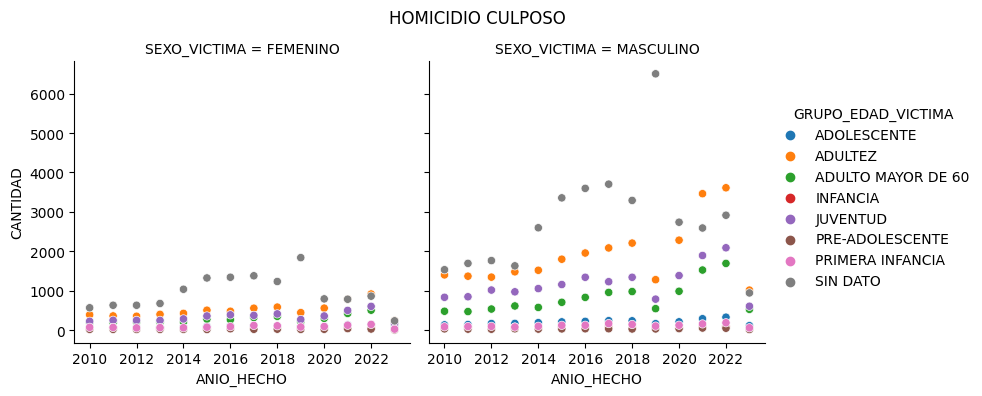

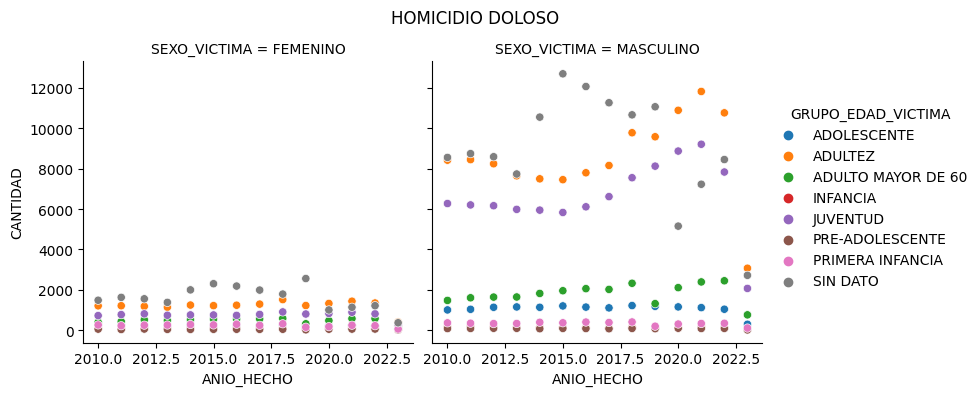

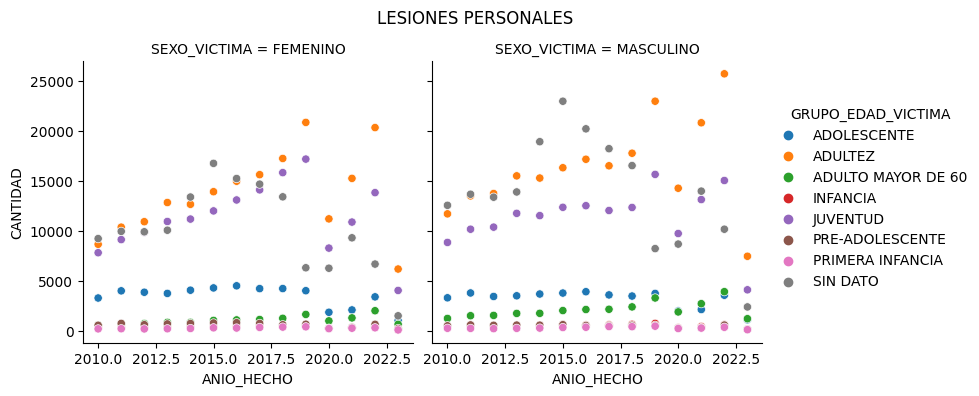

In [15]:
plot_relacional("scatter")

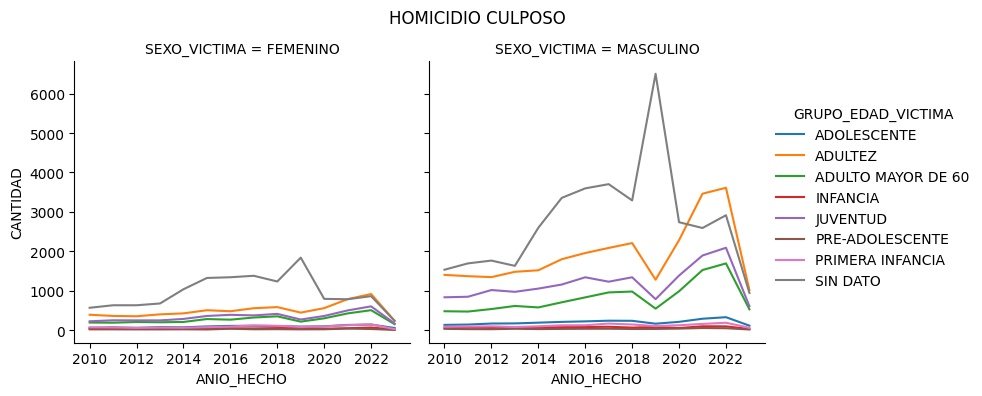

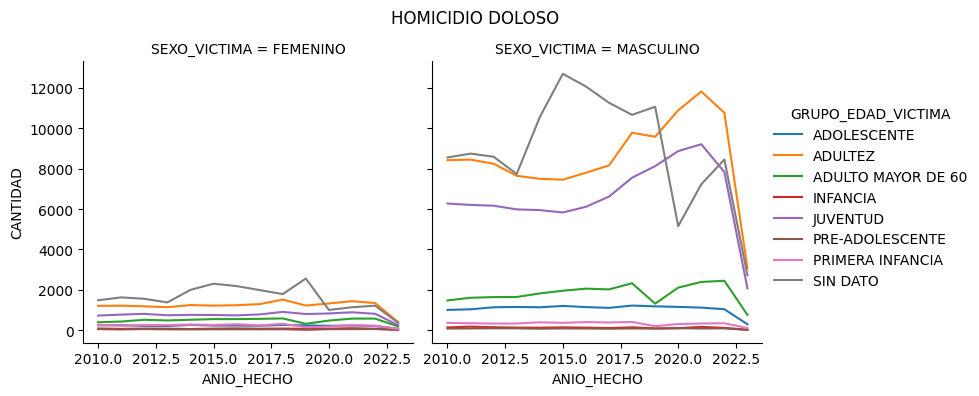

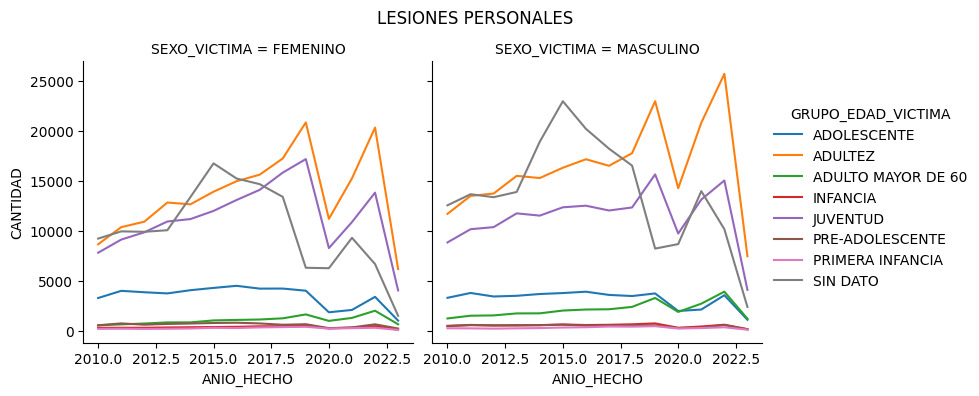

In [16]:
plot_relacional("line")

De acuerdo con ambos tipos de gráfico, ignorando el hecho de que se tiene una cantidad significativa de víctimas sin registro referente al grupo de edad en cada año, los grupos de delitos estudiados presentan un comportamiento en común, en que las personas adultas (menores a 60 años) son las que más sufren esta problemática de seguridad, seguidos por la juventud y, en tercer lugar se encuentran los adultos mayores de 60 años, aunque particularme los adolescentes sufren más lesiones personales que el anterior grupo de edad mencionado. Adicionalmente, si nos fijamos en el sexo, en ambos casos de homicidio son los hombres las principales víctimas; aunque tal diferencia no es tan notable en lo que respecta a las lesiones personales, puesto que en entre los años 2018-2019 las mujeres jóvenes sufrieron más lesiones, al igual que las mujeres adolescentes hasta el año 2019.

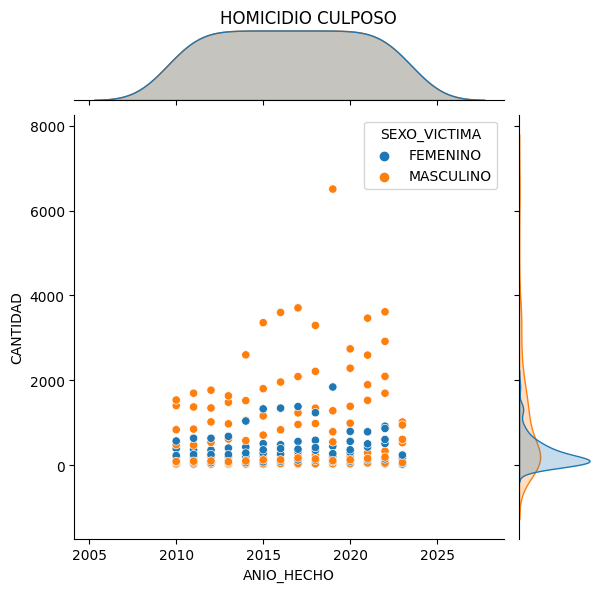

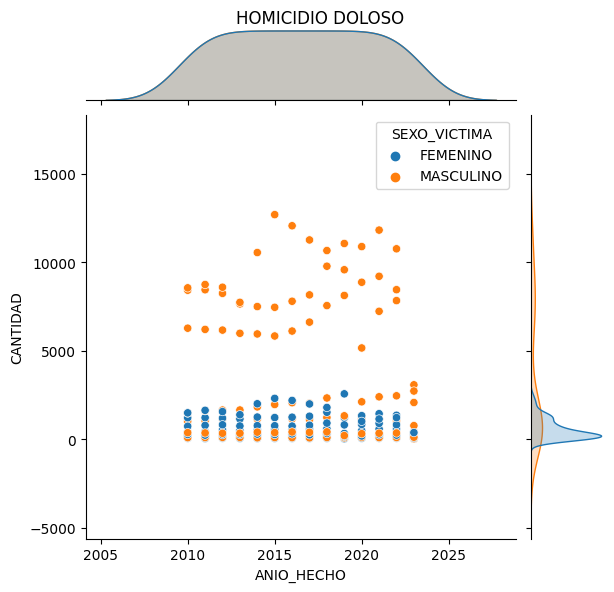

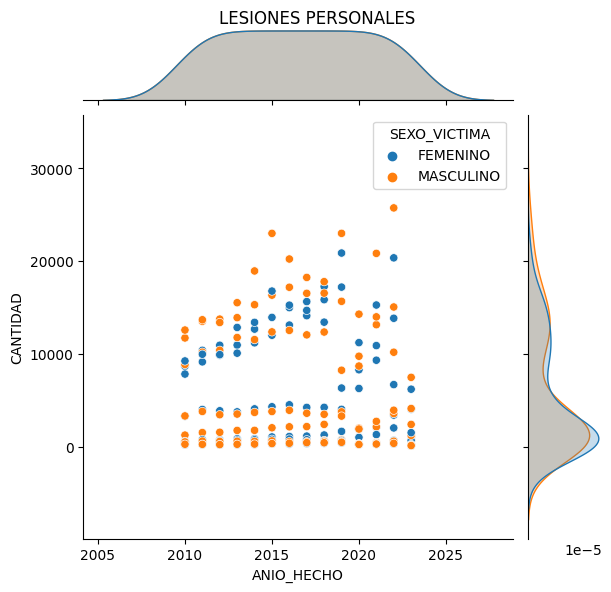

In [17]:
for i,delito in enumerate(delitos):
    ax = sns.jointplot(x=delito.index,y="CANTIDAD",hue="SEXO_VICTIMA",data=delito)
    ax.fig.subplots_adjust(top = 0.95)
    ax.fig.suptitle(titles[i])
    plt.show()

Se observa una tendencia poco normalizada en los delitos de homicidio (tanto doloso como culposo), donde destaca el hecho de existir pocos homicidios en mujeres comparado a los hombres víctimas de este delito. Por el contrario, el delito de lesiones personales es más normalizado, con poca diferencia en el número de víctimas entre ambos sexos.  

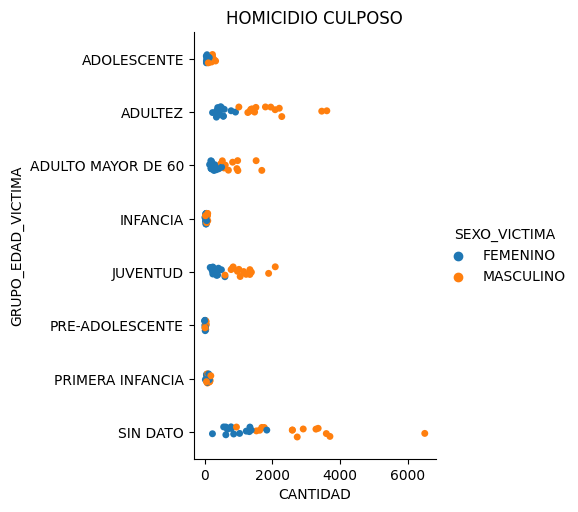

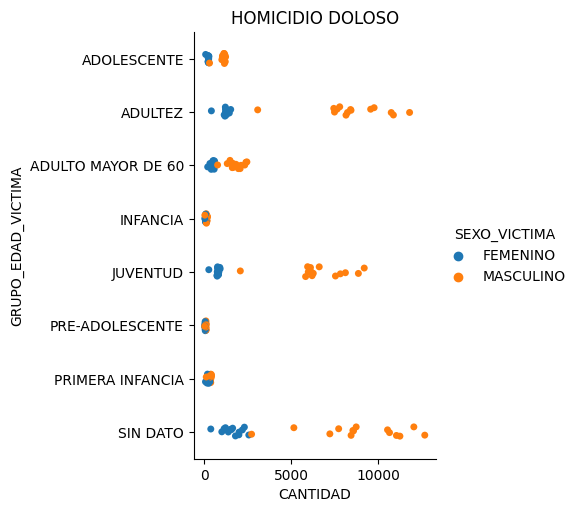

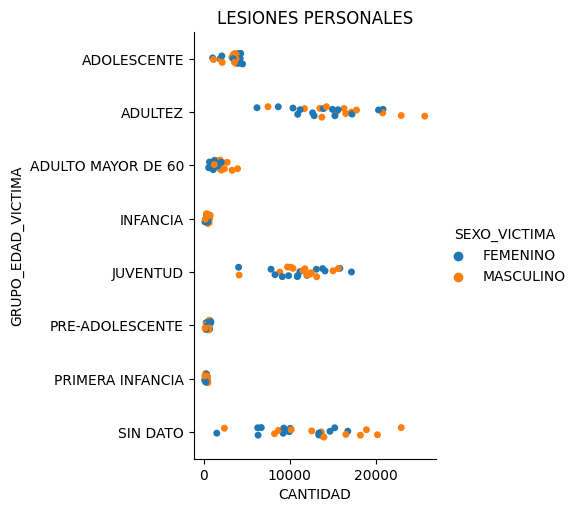

In [18]:
catplot("strip")

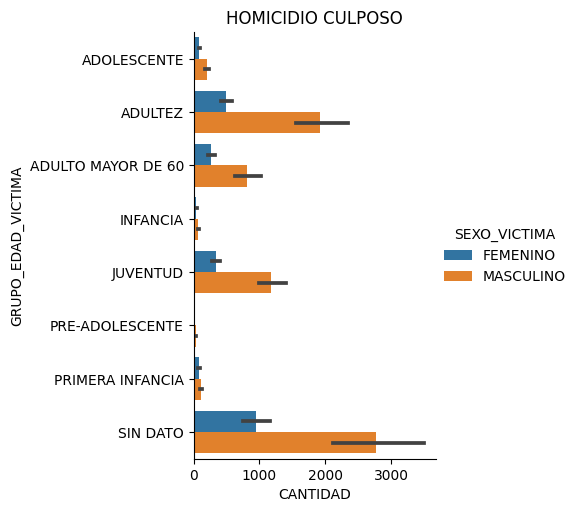

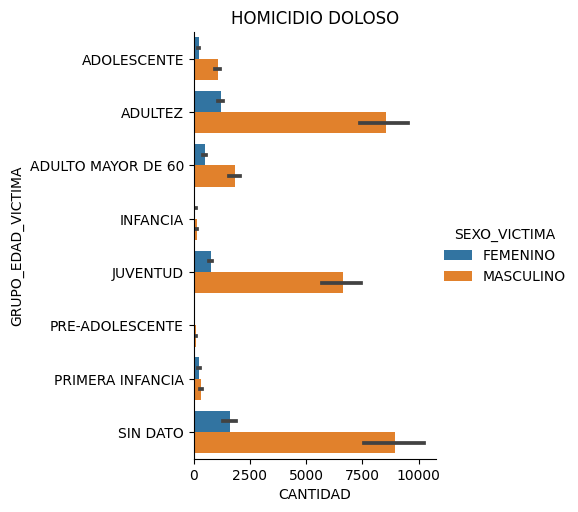

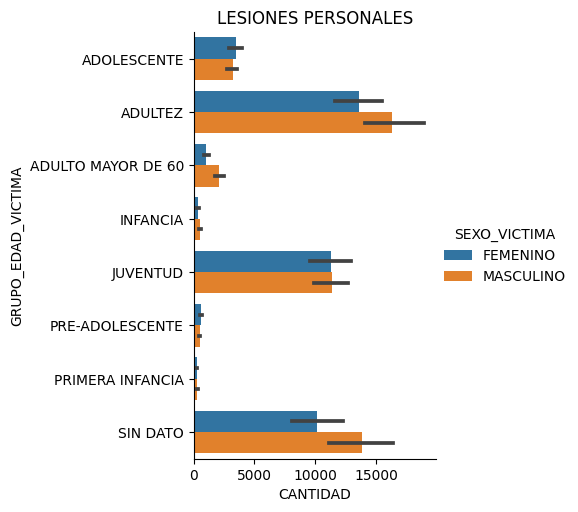

In [19]:
catplot("bar")

Con la observación de los últimos dos tipos de gráficos se destaca la buena noticia de que las personas de corta edad (adolescentes y menores) sufren menos casos de homicidio e incluso ocurre igual si hablamos de lesiones personales y, una vez más, se presencia la relevancia en el número de adultos y jóvenes que son víctimas de estos delitos.

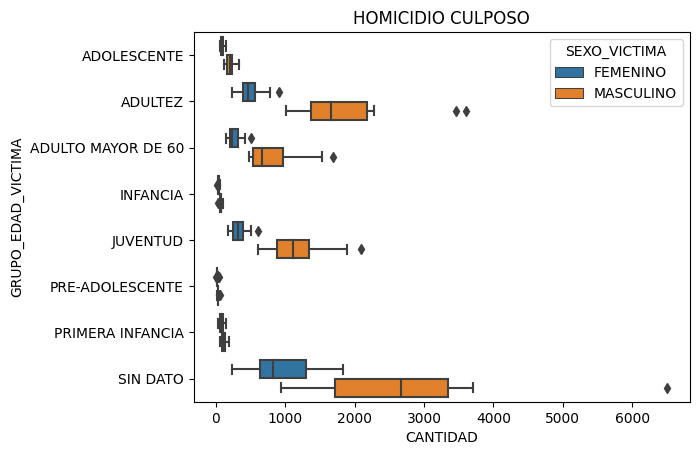

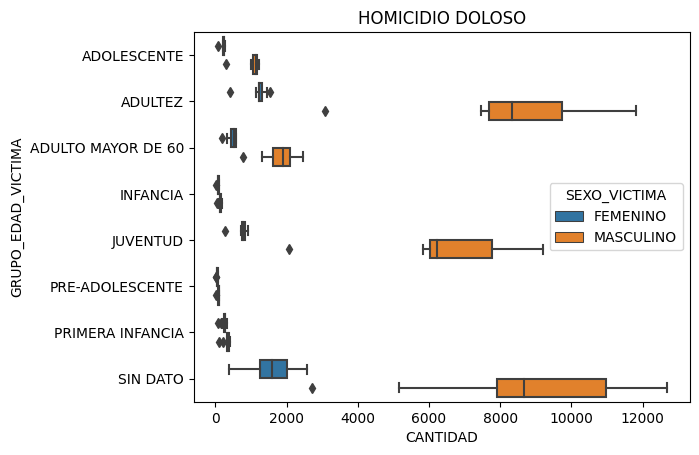

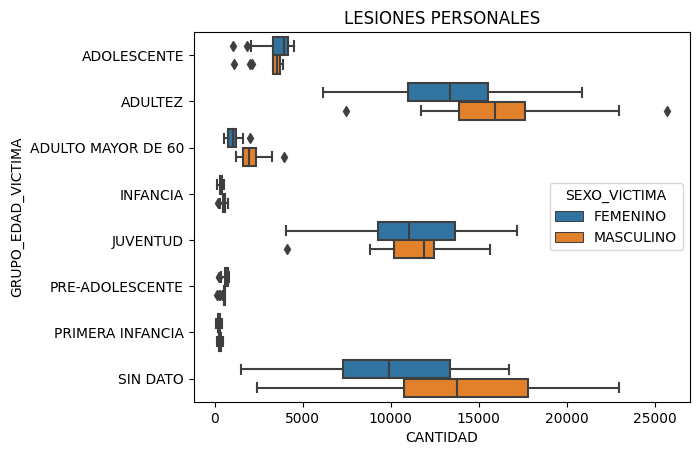

In [ ]:
for i,delito in enumerate(delitos):
        sns.boxplot(x="CANTIDAD", y="GRUPO_EDAD_VICTIMA",hue="SEXO_VICTIMA",data=delito)
        plt.title(titles[i])
        plt.show()

Se preparan de igual forma los datasets de la otra fuente de datos.

## Ministerio de Defensa Nacional
### Preparación de los datos.
A continuación se presenta la preparación de los datos.

In [25]:
# Homicidio Colectivo
homic_colect = pd.read_csv('./data/HOMICIDIO_COLECTIVO_V_CTIMAS.csv', sep=',', parse_dates=True)
# Homicidio
homicidio = pd.read_csv('./data/HOMICIDIO.csv', sep=',', parse_dates=True)
# Lesiones Personales
lesiones_pers = pd.read_csv('./data/LESIONES_PERSONALES.csv', sep=',', parse_dates=True)

Se revisó con anterioridad y se observó que la columna correspondiente a la fecha (cuyo nombre también se ha conocido) no tiene el tipo adecuado, por tanto, se realizan las siguientes modificaciones.

**Modificaciones:** 
- Previo a la preparación de los datasets se debe modificar el tipo de la columna correspondiente a la fecha de hecho como datetime.
- El período tomado para el análisis es anual, con lo cual, se añade una nueva columna 'ANIO_HECHO' a cada uno de los dataframe que ahora se están revisando. 

In [26]:
def fecha_anio(list_frame):
    for frame in list_frame:
        frame['FECHA HECHO'] = pd.to_datetime(frame['FECHA HECHO'], format='%d/%m/%Y')
        frame['ANIO_HECHO'] = pd.DatetimeIndex(frame['FECHA HECHO']).year

list_frame = [homic_colect, homicidio, lesiones_pers]
fecha_anio(list_frame)

In [19]:
display(homic_colect.info())
display(homicidio.info())
display(lesiones_pers.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 623 entries, 0 to 622
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   FECHA HECHO   623 non-null    datetime64[ns]
 1   COD_DEPTO     623 non-null    int64         
 2   DEPARTAMENTO  623 non-null    object        
 3   COD_MUNI      623 non-null    int64         
 4   MUNICIPIO     623 non-null    object        
 5   ZONA          623 non-null    object        
 6   CANTIDAD      623 non-null    int64         
 7   ANIO_HECHO    623 non-null    int64         
dtypes: datetime64[ns](1), int64(4), object(3)
memory usage: 39.1+ KB


None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 226883 entries, 0 to 226882
Data columns (total 9 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   FECHA HECHO   226883 non-null  datetime64[ns]
 1   COD_DEPTO     226883 non-null  int64         
 2   DEPARTAMENTO  226883 non-null  object        
 3   COD_MUNI      226883 non-null  int64         
 4   MUNICIPIO     226883 non-null  object        
 5   ZONA          226883 non-null  object        
 6   SEXO          226883 non-null  object        
 7   CANTIDAD      226883 non-null  int64         
 8   ANIO_HECHO    226883 non-null  int64         
dtypes: datetime64[ns](1), int64(4), object(4)
memory usage: 15.6+ MB


None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 769456 entries, 0 to 769455
Data columns (total 8 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   FECHA HECHO   769456 non-null  datetime64[ns]
 1   COD_DEPTO     769456 non-null  int64         
 2   DEPARTAMENTO  769456 non-null  object        
 3   COD_MUNI      769456 non-null  int64         
 4   MUNICIPIO     769456 non-null  object        
 5   SEXO          769456 non-null  object        
 6   CANTIDAD      769456 non-null  int64         
 7   ANIO_HECHO    769456 non-null  int64         
dtypes: datetime64[ns](1), int64(4), object(3)
memory usage: 47.0+ MB


None

Se tiene por cada delito la siguiente cantidad total de victimas:

- Homic_colect: 623
- Homicidio: 226883
- Lesiones_pers: 769456

Revisión en los datos de las columnas necesarias de cada dataframe.

In [27]:
nombre_col_test = homicidio.columns
nombre_col_test = nombre_col_test.drop(['FECHA HECHO', 'COD_DEPTO', 'COD_MUNI'])
print(nombre_col_test)

Index(['DEPARTAMENTO', 'MUNICIPIO', 'ZONA', 'SEXO', 'CANTIDAD', 'ANIO_HECHO'], dtype='object')


In [43]:
def unique_values(data_frame):
    nombre_col = data_frame.columns
    nombre_col = nombre_col.drop(['FECHA HECHO', 'COD_DEPTO', 'COD_MUNI'])
    for column in nombre_col: 
        print(f'>> {column}\n')
        print(data_frame[column].unique(), end='\n\n')

unique_values(homicidio)

>> DEPARTAMENTO

['ANTIOQUIA' 'ATLÁNTICO' 'BOGOTÁ D.C.' 'BOLÍVAR' 'BOYACÁ' 'CALDAS'
 'CAQUETÁ' 'CAUCA' 'CÓRDOBA' 'CUNDINAMARCA' 'HUILA' 'LA GUAJIRA'
 'MAGDALENA' 'META' 'NARIÑO' 'NORTE DE SANTANDER' 'RISARALDA' 'SANTANDER'
 'TOLIMA' 'VALLE DEL CAUCA' 'ARAUCA' 'PUTUMAYO' 'AMAZONAS' 'CESAR' 'CHOCÓ'
 'SUCRE' 'CASANARE' 'QUINDÍO' 'GUAVIARE' 'SAN ANDRÉS ISLAS' 'VICHADA'
 'VAUPÉS' 'GUAINÍA']

>> MUNICIPIO

['MEDELLIN' 'ANDES' 'APARTADO' ... 'SUSA' 'BUSBANZA' 'FLORESTA']

>> ZONA

['RURAL' 'URBANA']

>> SEXO

['MASCULINO' 'FEMENINO' 'NO REPORTA']

>> CANTIDAD

[ 1 13  6  2  3 15  4 17  9  8 10  5  7 12 24 11 26 14 18 16 19 34 22 28
 20 33 27 21 25]

>> ANIO_HECHO

[2003 2004 2005 2006 2007 2008 2009 2010 2011 2012 2013 2014 2015 2016
 2017 2018 2019 2020 2021 2022 2023]



In [44]:
unique_values(homic_colect)

>> DEPARTAMENTO

['VALLE DEL CAUCA' 'ARAUCA' 'ANTIOQUIA' 'BOGOTÁ D.C.' 'CESAR' 'BOYACÁ'
 'CÓRDOBA' 'TOLIMA' 'BOLÍVAR' 'NARIÑO' 'CUNDINAMARCA' 'RISARALDA'
 'NORTE DE SANTANDER' 'SANTANDER' 'CASANARE' 'ATLÁNTICO' 'CAQUETÁ'
 'CALDAS' 'CAUCA' 'QUINDÍO' 'LA GUAJIRA' 'SUCRE' 'MAGDALENA' 'META'
 'PUTUMAYO' 'HUILA' 'CHOCÓ' 'GUAVIARE' 'VICHADA' 'AMAZONAS']

>> MUNICIPIO

['CALI' 'TAME' 'FORTUL' 'SAN CARLOS' 'MEDELLIN' 'REMEDIOS' 'BOGOTA, D.C.'
 'CURUMANI' 'GINEBRA' 'PAIPA' 'CHINU' 'DAGUA' 'ARMERO' 'CARTAGENA'
 'TANGUA' 'FUSAGASUGA' 'DOSQUEBRADAS' 'JUNIN' 'CUCUTA' 'TULUA' 'MISTRATO'
 'SURATA' 'GUACARI' 'CUCUTILLA' 'YOPAL' 'GUAYABAL DE SIQUIMA'
 'BUENAVENTURA' 'RICAURTE' 'SILVANIA' 'URRAO' 'MALAMBO' 'YARUMAL'
 'PUERTO RICO' 'GRANADA' 'VIOTA' 'SAMANA' 'LA VEGA' 'VALLEDUPAR' 'ARMENIA'
 'MAICAO' 'SARAVENA' 'SANTA BARBARA' 'SINCELEJO' 'PATIA' 'SOACHA'
 'SANTA MARTA' 'IPIALES' 'FLORENCIA' 'SALAMINA' 'ORITO' 'BARRANCAS'
 'LEJANIAS' 'CAJAMARCA' 'GALERAS' 'CHISCAS' 'MANIZALES' 'SAN AGUSTIN'
 'FUNZA' 'GIR

In [45]:
unique_values(lesiones_pers)

>> DEPARTAMENTO

['ANTIOQUIA' 'ATLÁNTICO' 'BOGOTÁ D.C.' 'BOLÍVAR' 'BOYACÁ' 'CALDAS'
 'CAQUETÁ' 'CAUCA' 'CESAR' 'CÓRDOBA' 'CUNDINAMARCA' 'CHOCÓ' 'HUILA'
 'LA GUAJIRA' 'MAGDALENA' 'META' 'NARIÑO' 'NORTE DE SANTANDER' 'QUINDÍO'
 'RISARALDA' 'SANTANDER' 'SUCRE' 'TOLIMA' 'VALLE DEL CAUCA' 'CASANARE'
 'AMAZONAS' 'GUAINÍA' 'GUAVIARE' 'ARAUCA' 'PUTUMAYO' 'VICHADA'
 'SAN ANDRÉS ISLAS' 'VAUPÉS']

>> MUNICIPIO

['MEDELLIN' 'EL CARMEN DE VIBORAL' 'FREDONIA' ... 'NOROSI' 'ZAPAYAN'
 'SAN JUANITO']

>> SEXO

['FEMENINO' 'MASCULINO' 'NO REPORTA' '(en blanco)' '-']

>> CANTIDAD

[  1   7   2   6  13  38  64  22   3   8   9  11  43   5  24  10  20   4
  14  15  12  17  19  28  16  26  25  40  33  21  27  41  31  23  76 133
  32  34  39  35  18  36  29  37  30  42  44  45  59  47  62  49  95  78
  50  48  51  58  65  66  56  74  63  92  46  54  70  69 137  86  53  93
  89 124  60  52  84  87  91  77  61  57 112  55  90 105  67  71  79  75
  99  68  73 102  83  81  85  88  80 117  94 104 107  97 130 153]


Luego de revisar el contenido por cada columna, se observan algunos datos perdidos, que se guardarán con un mismo valor: 'NO REPORTA'

In [46]:
#Número de homicidio por SEXO, registrados como 'NO REPORTA'
nan_sexo_homicidio = homicidio['SEXO'] == 'NO REPORTA'
nan_homicidio = len(homicidio[nan_sexo_homicidio])

#Número de lesiones personales por SEXO, sin registrar
nan_sexo_lesiones = (lesiones_pers['SEXO'] != 'MASCULINO') & (lesiones_pers['SEXO'] != 'FEMENINO')
lesiones_pers.loc[nan_sexo_lesiones, 'SEXO'] = 'NO REPORTA'
nan_sexo_l = lesiones_pers['SEXO'] == 'NO REPORTA'
nan_lesiones = len(lesiones_pers[nan_sexo_l])

print("Tras la revisión se concluye:")
print("- El dataframe sobre Homicidio colectivo está completo")
print(f"- Existen {nan_homicidio} datos de homicidio sin un registro correspondiente al género/sexo.")
print(f"- Existen {nan_lesiones} datos de lesiones personales sin un registro correspondiente al género/sexo.")
print()
print("Lo anterior corresponde al siguiente porcentaje:")
print(f"- Homicido: {round(100*nan_homicidio/len(homicidio), 2)}%")
print(f"- Lesiones personales: {round(100*nan_lesiones/len(lesiones_pers), 2)}%")

Tras la revisión se concluye:
- El dataframe sobre Homicidio colectivo está completo
- Existen 138 datos de homicidio sin un registro correspondiente al género/sexo.
- Existen 396 datos de lesiones personales sin un registro correspondiente al género/sexo.

Lo anterior corresponde al siguiente porcentaje:
- Homicido: 0.06%
- Lesiones personales: 0.05%


Nuevamente, en el análsis se omitirán los registros perdidos al ser un porcentaje poco representativo.

In [47]:
homicidio.loc[nan_sexo_homicidio, 'SEXO'] = np.nan
lesiones_pers.loc[nan_sexo_l,'SEXO'] = np.nan


In [48]:
# Agrupación sobre cada delito (a nivel nacional)

def group_frame(frame,columns=None):
    indice = ['ANIO_HECHO','CANTIDAD'] # columnas en común entre cada dataframe
    by1 = ['ANIO_HECHO']
    if type(columns) == str:
        columns = columns.split()
    if columns != None:
        indice += columns
        by1 += columns

    frame_grouped = frame[indice].groupby(by=by1,axis=0,dropna=True,as_index=False).sum()    
    frame_grouped.set_index('ANIO_HECHO',inplace=True)

    return frame_grouped

In [49]:
# Homicidio
homicidio_nacional = group_frame(homicidio,columns=['ZONA','SEXO'])
print('HOMICIDIO')
display(homicidio_nacional.head())

# Homicidio Colectivo
homic_colect_nacional = group_frame(homic_colect,columns='ZONA')
print('HOMICIDIO COLECTIVO')
display(homic_colect_nacional.head())

# Lesiones Personales
les_pers_nacional = group_frame(lesiones_pers,columns='SEXO')
print('LESIONES PERSONALES')
display(les_pers_nacional.head())

HOMICIDIO


,ZONA,SEXO,CANTIDAD
ANIO_HECHO,,,
2003,RURAL,FEMENINO,647
2003,RURAL,MASCULINO,7097
2003,URBANA,FEMENINO,1284
2003,URBANA,MASCULINO,14462
2004,RURAL,FEMENINO,568


HOMICIDIO COLECTIVO


,ZONA,CANTIDAD
ANIO_HECHO,,
2003,RURAL,263
2003,URBANA,241
2004,RURAL,162
2004,URBANA,101
2005,RURAL,152


LESIONES PERSONALES


,SEXO,CANTIDAD
ANIO_HECHO,,
2003,FEMENINO,11235
2003,MASCULINO,28784
2004,FEMENINO,8277
2004,MASCULINO,24253
2005,FEMENINO,8598


In [50]:
delitos = [homicidio_nacional,homic_colect_nacional,les_pers_nacional]
titles = ['HOMICIDIO','HOMICIDIO COLECTIVO','LESIONES PERSONALES']
for i,delito in enumerate(delitos):
    print(titles[i])
    display(delito.describe().T)

HOMICIDIO


,count,mean,std,min,25%,50%,75%,max
CANTIDAD,84.0,3715.047619,3836.664251,65.0,603.25,1172.5,6467.75,14462.0


HOMICIDIO COLECTIVO


,count,mean,std,min,25%,50%,75%,max
CANTIDAD,42.0,74.095238,57.258851,12.0,31.25,57.5,100.75,263.0


LESIONES PERSONALES


,count,mean,std,min,25%,50%,75%,max
CANTIDAD,42.0,38235.97619,19091.242424,8277.0,22204.75,34344.5,51068.5,72972.0


### Visualización de datos.

Para el análisis con los gráficos se tiene en cuenta la falta de relación que existe entre las variables categóricas por cada grupo de delitos, es decir, los casos de homicidio se distribuyen entre el sexo de la víctima y la zona en que ocurre el hecho; mientras los homicidios colectivos únicamente tiene en cuenta la distribución entre las zonas en que se presenta el hecho; las lesiones personales, contrariamente, registran casos simplemente acorde al sexo de la víctima.

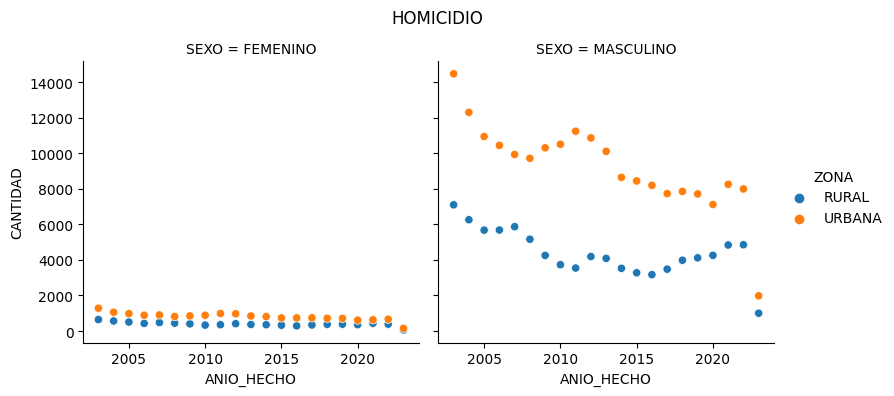

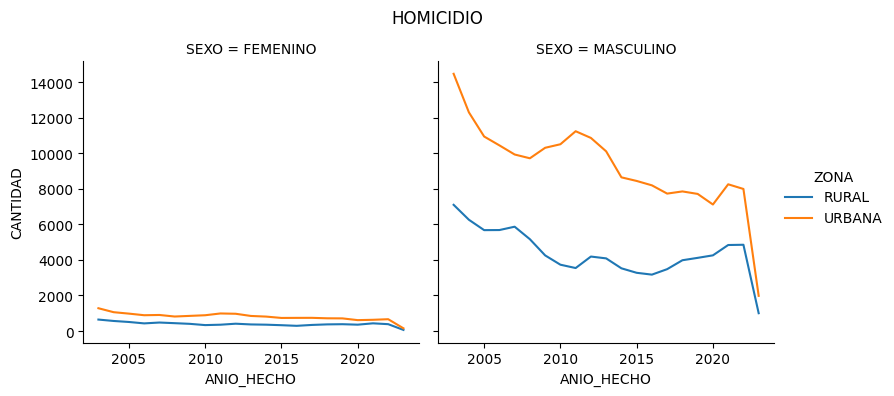

In [ ]:
delitos = [homicidio_nacional,homic_colect_nacional,les_pers_nacional]
titles = ['HOMICIDIO','HOMICIDIO COLECTIVO','LESIONES PERSONALES']

def rel_plot(i,tipo,hue=None,col=None):
    ax = sns.relplot(x=delitos[i].index, y="CANTIDAD", hue=hue, col=col, height=4, kind=tipo,data=delitos[i])
    ax.figure.subplots_adjust(top = 0.85)
    ax.figure.suptitle(titles[i])
    plt.show()

rel_plot(0,'scatter',hue='ZONA',col='SEXO')
rel_plot(0,'line',hue='ZONA',col='SEXO')

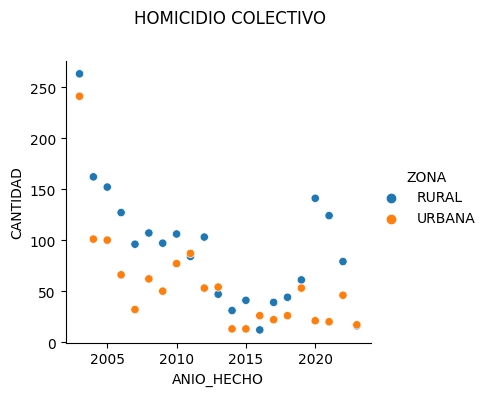

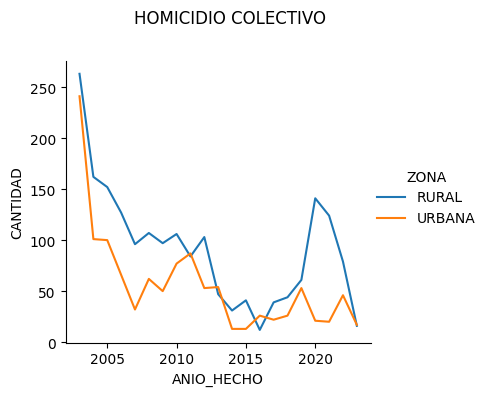

In [35]:
rel_plot(1,'scatter',hue='ZONA')
rel_plot(1,'line',hue='ZONA')

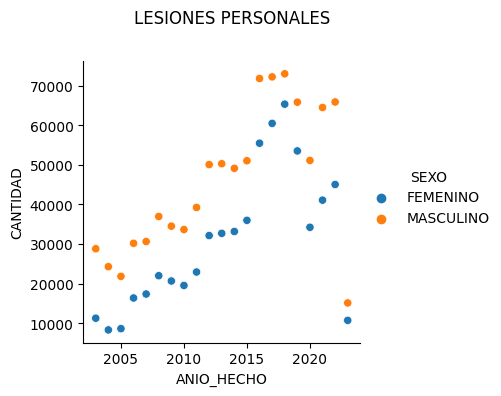

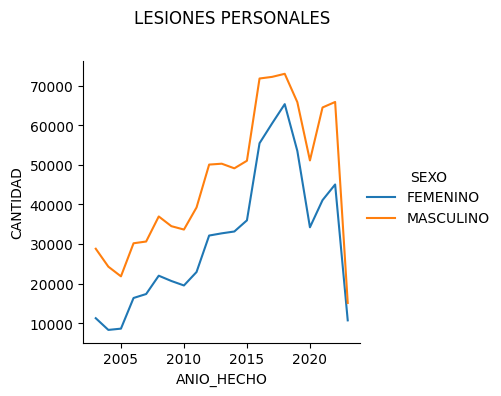

In [36]:
rel_plot(2,'scatter',hue='SEXO')
rel_plot(2,'line',hue='SEXO')

En esta base de datos se hace un registro más generalizado (sin considerar rango de edad), de este modo se pueden apreciar los reportes mayoritarios por parte de víctimas de sexo masculino y ubicados en zona urbana, aunque los casos de homicidios colectivo son más frecuentes en la zona rural, siendo una excepción los años 2011, 2013, 2016 y el presente año.

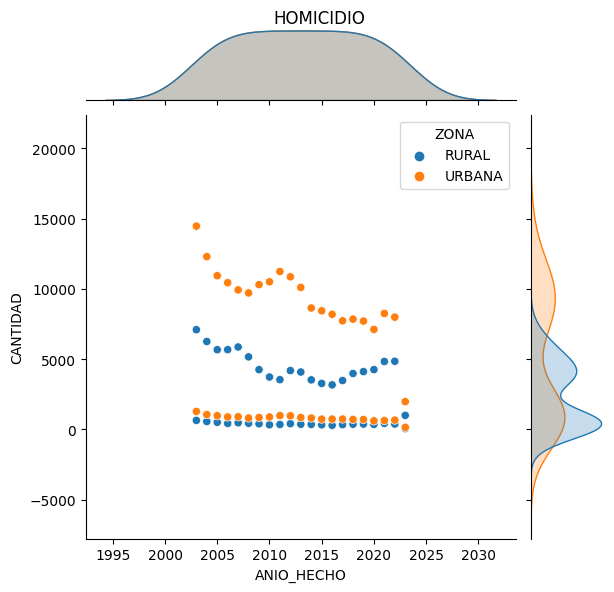

In [37]:
def joint_plot(i,hue=None):
    ax = sns.jointplot(x=delitos[i].index, y="CANTIDAD", hue=hue, data=delitos[i])
    ax.fig.subplots_adjust(top = 0.95)
    ax.fig.suptitle(titles[i])
    plt.show()

joint_plot(0,hue='ZONA')

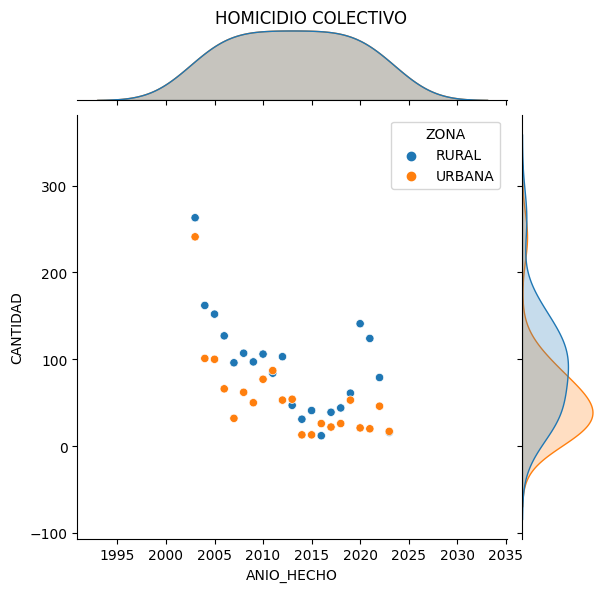

In [38]:
joint_plot(1,hue='ZONA')

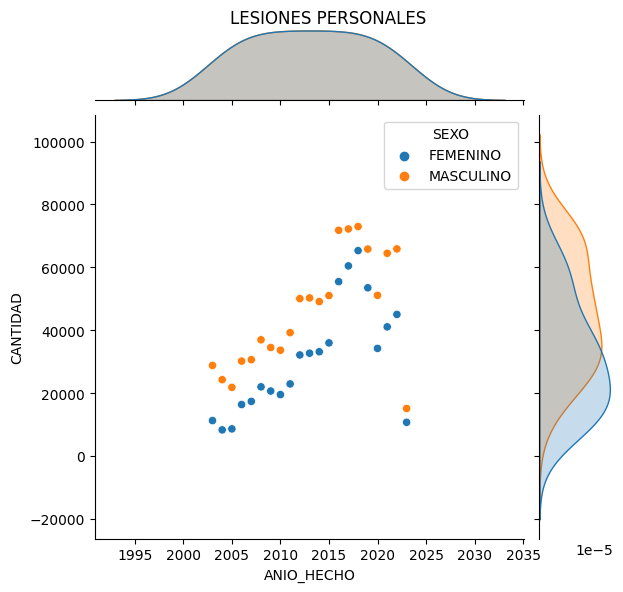

In [39]:
joint_plot(2,hue='SEXO')

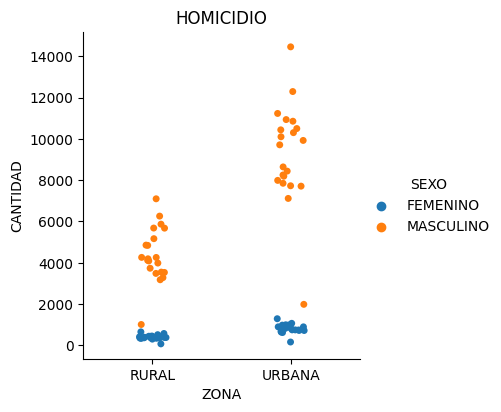

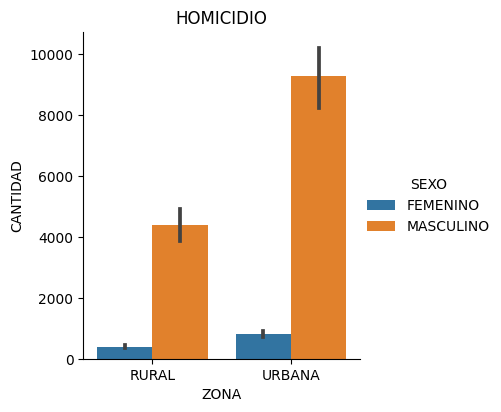

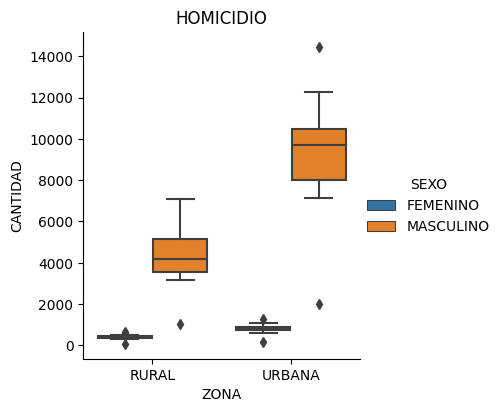

In [40]:
def cat_plot(i,tipo,x,hue=None):
    sns.catplot(x=x, y="CANTIDAD", hue=hue, height=4, kind=tipo,data=delitos[i])
    plt.title(titles[i])
    plt.show()

cat_plot(0,'strip',x='ZONA',hue='SEXO')
cat_plot(0,'bar',x='ZONA',hue='SEXO')
cat_plot(0,'box',x='ZONA',hue='SEXO')

Se observa gran importancia en homicidios a hombres, con pocos casos reportados de mujeres víctimas; siendo más frecuentes en la zona urbana.

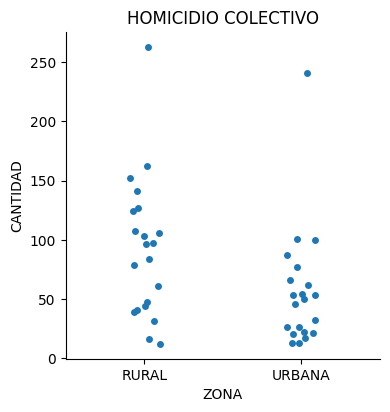

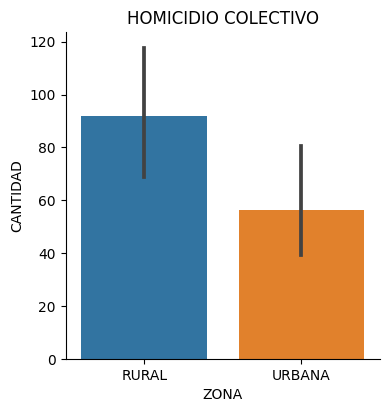

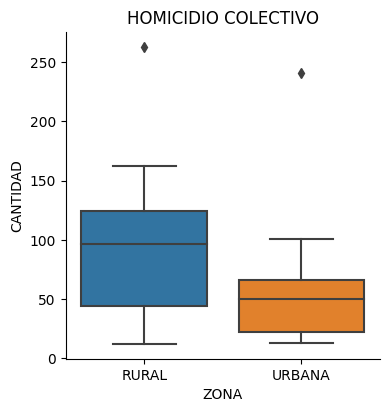

In [41]:
cat_plot(1,'strip',x='ZONA')
cat_plot(1,'bar',x='ZONA')
cat_plot(1,'box',x='ZONA')

Como ya se ha mencionado, los homicidios colectivos en zona rural son más frecuentes, siendo incluso mayor la media con respecto al tercer cuartil de las víctimas presentes en la zona urbana.

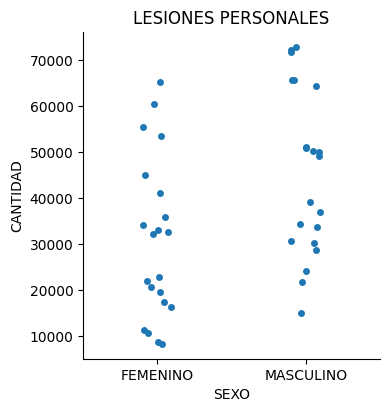

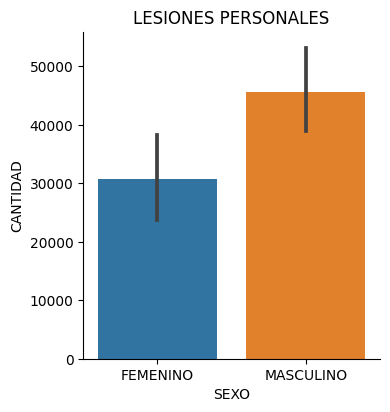

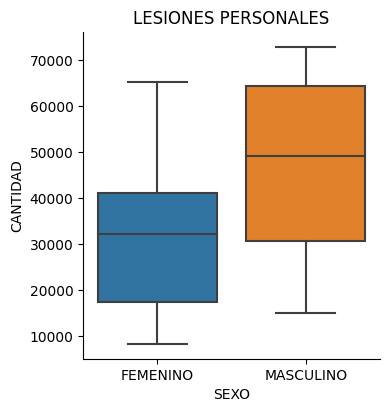

In [42]:
cat_plot(2,'strip',x='SEXO')
cat_plot(2,'bar',x='SEXO')
cat_plot(2,'box',x='SEXO')

A nivel general, las lesiones personales son más equilibradas entre ambos sexos en comparación con los homicidios, características que se observó en la primera fuente de datos.

## Análisis a Nivel Departamental.
En esta ocasión se considerará únicamente la primera fuente de base de datos (la Fiscalía General de la Nación).

In [43]:
vict_año = vict_nacional.loc[vict_nacional['CANTIDAD'] == vict_nacional['CANTIDAD'].max()]
print("AÑO Y DELITO EN QUE SE PRESENTÓ EL MAYOR NÚMERO DE VÍCTIMAS")
display(vict_año)

vict__homCulp_año = vict_nacional_homCulp.loc[vict_nacional_homCulp['CANTIDAD'] == vict_nacional_homCulp['CANTIDAD'].max()]
print(f"AÑO EN QUE SE PRESENTÓ EL MAYOR NÚMERO DE HOMICIDIOS CULPOSOS: {vict__homCulp_año.index[0]}")

vict__homDolo_año = vict_nacional_homDolo.loc[vict_nacional_homDolo['CANTIDAD'] == vict_nacional_homDolo['CANTIDAD'].max()]
print(f"AÑO EN QUE SE PRESENTÓ EL MAYOR NÚMERO DE HOMICIDIOS DOLOSOS: {vict__homDolo_año.index[0]}")

vict__lesiones_año = vict_nacional_lesiones.loc[vict_nacional_lesiones['CANTIDAD'] == vict_nacional_lesiones['CANTIDAD'].max()]
print(f"AÑO EN QUE SE PRESENTÓ EL MAYOR NÚMERO DE LESIONES PERSONALES: {vict__lesiones_año.index[0]}")

AÑO Y DELITO EN QUE SE PRESENTÓ EL MAYOR NÚMERO DE VÍCTIMAS


,,GRUPO_EDAD_VICTIMA,SEXO_VICTIMA,CANTIDAD
GRUPO_DELITO,ANIO_HECHO,,,
LESIONES PERSONALES,2022,ADULTEZ,MASCULINO,25713


AÑO EN QUE SE PRESENTÓ EL MAYOR NÚMERO DE HOMICIDIOS CULPOSOS: 2019
AÑO EN QUE SE PRESENTÓ EL MAYOR NÚMERO DE HOMICIDIOS DOLOSOS: 2015
AÑO EN QUE SE PRESENTÓ EL MAYOR NÚMERO DE LESIONES PERSONALES: 2022


El mayor número de víctimas ocurrió en el año 2022 y corresponde al delito de lesiones personales.

- En lo que corresponde a los homicidios culposos se tomará el año 2019.
- Para los casos de homicidio doloso se tendrá en cuenta el año 2015.
- En cuanto a las lesiones personales, se tendrán los casos del año 2022. 

In [44]:
def pivot_frame(frame,index,column,func):

    frame_pivoted = frame.pivot_table(index=index, columns=column, values='CANTIDAD', aggfunc=func)
    frame_pivoted.fillna(0, inplace=True)
    if func == np.mean:
        frame_pivoted = round(frame_pivoted)
    return frame_pivoted

In [45]:
columns = ['GRUPO_EDAD_VICTIMA', 'SEXO_VICTIMA']
index = ['GRUPO_DELITO','ANIO_HECHO','DEPARTAMENTO']
vict_sum = pivot_frame(vict_datos,index,columns, np.sum)
display(vict_sum.head())

GRUPO_EDAD_VICTIMA                                                              ADOLESCENTE  \
SEXO_VICTIMA                                                                       FEMENINO   
GRUPO_DELITO      ANIO_HECHO DEPARTAMENTO                                                     
HOMICIDIO CULPOSO 2010       AMAZONAS                                                   0.0   
                             ANTIOQUIA                                                  7.0   
                             ARAUCA                                                     1.0   
                             ARCHIPIÉLAGO DE SAN ANDRÉS, PROVIDENCIA Y SANTA...         0.0   
                             ATLÁNTICO                                                  0.0   

GRUPO_EDAD_VICTIMA                                                                         \
SEXO_VICTIMA                                                                    MASCULINO   
GRUPO_DELITO      ANIO_HECHO DEPARTAMENTO                                                   
HOMICIDIO CULPOSO 2010       AMAZONAS                                                 0.0   
                             ANTIOQUIA                                               22.0   
                             ARAUCA                                                   1.0   
                             ARCHIPIÉLAGO DE SAN ANDRÉS, PROVIDENCIA Y SANTA...       1.0   
                             ATLÁNTICO                                                5.0   

GRUPO_EDAD_VICTIMA                                                               ADULTEZ  \
SEXO_VICTIMA                                                                    FEMENINO   
GRUPO_DELITO      ANIO_HECHO DEPARTAMENTO                                                  
HOMICIDIO CULPOSO 2010       AMAZONAS                                                0.0   
                             ANTIOQUIA                                              61.0   
                             ARAUCA                                                  2.0   
                             ARCHIPIÉLAGO DE SAN ANDRÉS, PROVIDENCIA Y SANTA...      3.0   
                             ATLÁNTICO                                               6.0   

GRUPO_EDAD_VICTIMA                                                                         \
SEXO_VICTIMA                                                                    MASCULINO   
GRUPO_DELITO      ANIO_HECHO DEPARTAMENTO                                                   
HOMICIDIO CULPOSO 2010       AMAZONAS                                                 0.0   
                             ANTIOQUIA                                              191.0   
                             ARAUCA                                                   3.0   
                             ARCHIPIÉLAGO DE SAN ANDRÉS, PROVIDENCIA Y SANTA...       6.0   
                             ATLÁNTICO                                               22.0   

GRUPO_EDAD_VICTIMA                                                              ADULTO MAYOR DE 60  \
SEXO_VICTIMA                                                                              FEMENINO   
GRUPO_DELITO      ANIO_HECHO DEPARTAMENTO                                                            
HOMICIDIO CULPOSO 2010       AMAZONAS                                                          0.0   
                             ANTIOQUIA                                                        36.0   
                             ARAUCA                                                            0.0   
                             ARCHIPIÉLAGO DE SAN ANDRÉS, PROVIDENCIA Y SANTA...                1.0   
                             ATLÁNTICO                                                         4.0   

GRUPO_EDAD_VICTIMA                                                                         \
SEXO_VICTIMA                                                                    MASCULINO   
GRUPO_DEL

In [46]:
# Reordenación de las columnas

vict_sum = vict_sum[['PRIMERA INFANCIA','INFANCIA','PRE-ADOLESCENTE','ADOLESCENTE','JUVENTUD','ADULTEZ','ADULTO MAYOR DE 60','SIN DATO']]

In [47]:
# Distribución entre delitos.
    
vict_dep_homCulp = vict_sum.loc['HOMICIDIO CULPOSO', 2019]
vict_dep_homDolo = vict_sum.loc['HOMICIDIO DOLOSO', 2015]
vict_dep_lesiones = vict_sum.loc['LESIONES PERSONALES', 2022]

In [48]:
display(vict_dep_homCulp.head())
display(vict_dep_homDolo.head())
display(vict_dep_lesiones.head())

GRUPO_EDAD_VICTIMA                                 PRIMERA INFANCIA            \
SEXO_VICTIMA                                               FEMENINO MASCULINO   
DEPARTAMENTO                                                                    
AMAZONAS                                                        0.0       0.0   
ANTIOQUIA                                                      12.0      17.0   
ARAUCA                                                          0.0       1.0   
ARCHIPIÉLAGO DE SAN ANDRÉS, PROVIDENCIA Y SANTA...              0.0       0.0   
ATLÁNTICO                                                       4.0       3.0   

GRUPO_EDAD_VICTIMA                                 INFANCIA            \
SEXO_VICTIMA                                       FEMENINO MASCULINO   
DEPARTAMENTO                                                            
AMAZONAS                                                0.0       0.0   
ANTIOQUIA                                              18.0      19.0   
ARAUCA                                                  0.0       3.0   
ARCHIPIÉLAGO DE SAN ANDRÉS, PROVIDENCIA Y SANTA...      0.0       0.0   
ATLÁNTICO                                               1.0       2.0   

GRUPO_EDAD_VICTIMA                                 PRE-ADOLESCENTE            \
SEXO_VICTIMA                                              FEMENINO MASCULINO   
DEPARTAMENTO                                                                   
AMAZONAS                                                       0.0       0.0   
ANTIOQUIA                                                      4.0       8.0   
ARAUCA                                                         0.0       1.0   
ARCHIPIÉLAGO DE SAN ANDRÉS, PROVIDENCIA Y SANTA...             0.0       0.0   
ATLÁNTICO                                                      0.0       0.0   

GRUPO_EDAD_VICTIMA                                 ADOLESCENTE            \
SEXO_VICTIMA                                          FEMENINO MASCULINO   
DEPARTAMENTO                                                               
AMAZONAS                                                   0.0       0.0   
ANTIOQUIA                                                 18.0      29.0   
ARAUCA                                                     1.0       0.0   
ARCHIPIÉLAGO DE SAN ANDRÉS, PROVIDENCIA Y SANTA...         1.0       1.0   
ATLÁNTICO                                                  2.0       2.0   

GRUPO_EDAD_VICTIMA                                 JUVENTUD            \
SEXO_VICTIMA                                       FEMENINO MASCULINO   
DEPARTAMENTO                                                            
AMAZONAS                                                0.0       0.0   
ANTIOQUIA                                              69.0     159.0   
ARAUCA                                                  3.0       6.0   
ARCHIPIÉLAGO DE SAN ANDRÉS, PROVIDENCIA Y SANTA...      0.0       3.0   
ATLÁNTICO                                               6.0       8.0   

GRUPO_EDAD_VICTIMA                                  ADULTEZ            \
SEXO_VICTIMA                                       FEMENINO MASCULINO   
DEPARTAMENTO                                                            
AMAZONAS                                                0.0       2.0   
ANTIOQUIA                                              77.0     297.0   
ARAUCA                                                  3.0      11.0   
ARCHIPIÉLAGO DE SAN ANDRÉS, PROVIDENCIA Y SANTA...      2.0       5.0   
ATLÁNTICO                                               7.0      20.0   

GRUPO_EDAD_VICTIMA                                 ADULTO MAYOR DE 60  \
SEXO_VICTIMA                                                 FEMENINO   
DEPARTAMENTO                                                            
AMAZONAS                                                          1.0   
ANTIOQUIA                                             

GRUPO_EDAD_VICTIMA                                 PRIMERA INFANCIA            \
SEXO_VICTIMA                                               FEMENINO MASCULINO   
DEPARTAMENTO                                                                    
AMAZONAS                                                        0.0       3.0   
ANTIOQUIA                                                      22.0      27.0   
ARAUCA                                                          0.0       2.0   
ARCHIPIÉLAGO DE SAN ANDRÉS, PROVIDENCIA Y SANTA...              0.0       1.0   
ATLÁNTICO                                                       6.0      19.0   

GRUPO_EDAD_VICTIMA                                 INFANCIA            \
SEXO_VICTIMA                                       FEMENINO MASCULINO   
DEPARTAMENTO                                                            
AMAZONAS                                                0.0       2.0   
ANTIOQUIA                                               4.0      12.0   
ARAUCA                                                  1.0       1.0   
ARCHIPIÉLAGO DE SAN ANDRÉS, PROVIDENCIA Y SANTA...      0.0       1.0   
ATLÁNTICO                                               1.0       3.0   

GRUPO_EDAD_VICTIMA                                 PRE-ADOLESCENTE            \
SEXO_VICTIMA                                              FEMENINO MASCULINO   
DEPARTAMENTO                                                                   
AMAZONAS                                                       0.0       2.0   
ANTIOQUIA                                                      8.0       6.0   
ARAUCA                                                         0.0       0.0   
ARCHIPIÉLAGO DE SAN ANDRÉS, PROVIDENCIA Y SANTA...             0.0       0.0   
ATLÁNTICO                                                      1.0       2.0   

GRUPO_EDAD_VICTIMA                                 ADOLESCENTE            \
SEXO_VICTIMA                                          FEMENINO MASCULINO   
DEPARTAMENTO                                                               
AMAZONAS                                                   0.0       6.0   
ANTIOQUIA                                                 24.0     112.0   
ARAUCA                                                     0.0       2.0   
ARCHIPIÉLAGO DE SAN ANDRÉS, PROVIDENCIA Y SANTA...         0.0       1.0   
ATLÁNTICO                                                  4.0      43.0   

GRUPO_EDAD_VICTIMA                                 JUVENTUD            \
SEXO_VICTIMA                                       FEMENINO MASCULINO   
DEPARTAMENTO                                                            
AMAZONAS                                                0.0      11.0   
ANTIOQUIA                                              78.0     658.0   
ARAUCA                                                  4.0      41.0   
ARCHIPIÉLAGO DE SAN ANDRÉS, PROVIDENCIA Y SANTA...      0.0      15.0   
ATLÁNTICO                                              22.0     254.0   

GRUPO_EDAD_VICTIMA                                  ADULTEZ            \
SEXO_VICTIMA                                       FEMENINO MASCULINO   
DEPARTAMENTO                                                            
AMAZONAS                                                2.0      11.0   
ANTIOQUIA                                             133.0     911.0   
ARAUCA                                                  9.0      56.0   
ARCHIPIÉLAGO DE SAN ANDRÉS, PROVIDENCIA Y SANTA...      4.0      17.0   
ATLÁNTICO                                              36.0     310.0   

GRUPO_EDAD_VICTIMA                                 ADULTO MAYOR DE 60  \
SEXO_VICTIMA                                                 FEMENINO   
DEPARTAMENTO                                                            
AMAZONAS                                                          2.0   
ANTIOQUIA                                             

GRUPO_EDAD_VICTIMA                                 PRIMERA INFANCIA            \
SEXO_VICTIMA                                               FEMENINO MASCULINO   
DEPARTAMENTO                                                                    
AMAZONAS                                                        0.0       0.0   
ANTIOQUIA                                                      31.0      22.0   
ARAUCA                                                          0.0       0.0   
ARCHIPIÉLAGO DE SAN ANDRÉS, PROVIDENCIA Y SANTA...              0.0       0.0   
ATLÁNTICO                                                      10.0      17.0   

GRUPO_EDAD_VICTIMA                                 INFANCIA            \
SEXO_VICTIMA                                       FEMENINO MASCULINO   
DEPARTAMENTO                                                            
AMAZONAS                                                0.0       0.0   
ANTIOQUIA                                              45.0      61.0   
ARAUCA                                                  0.0       0.0   
ARCHIPIÉLAGO DE SAN ANDRÉS, PROVIDENCIA Y SANTA...      2.0       4.0   
ATLÁNTICO                                              16.0      24.0   

GRUPO_EDAD_VICTIMA                                 PRE-ADOLESCENTE            \
SEXO_VICTIMA                                              FEMENINO MASCULINO   
DEPARTAMENTO                                                                   
AMAZONAS                                                       1.0       3.0   
ANTIOQUIA                                                     59.0      38.0   
ARAUCA                                                         2.0       3.0   
ARCHIPIÉLAGO DE SAN ANDRÉS, PROVIDENCIA Y SANTA...             0.0       0.0   
ATLÁNTICO                                                     15.0      14.0   

GRUPO_EDAD_VICTIMA                                 ADOLESCENTE            \
SEXO_VICTIMA                                          FEMENINO MASCULINO   
DEPARTAMENTO                                                               
AMAZONAS                                                   4.0       6.0   
ANTIOQUIA                                                368.0     260.0   
ARAUCA                                                     7.0       6.0   
ARCHIPIÉLAGO DE SAN ANDRÉS, PROVIDENCIA Y SANTA...        12.0       6.0   
ATLÁNTICO                                                 85.0     136.0   

GRUPO_EDAD_VICTIMA                                 JUVENTUD            \
SEXO_VICTIMA                                       FEMENINO MASCULINO   
DEPARTAMENTO                                                            
AMAZONAS                                               23.0      27.0   
ANTIOQUIA                                            1341.0    1149.0   
ARAUCA                                                 43.0      37.0   
ARCHIPIÉLAGO DE SAN ANDRÉS, PROVIDENCIA Y SANTA...     55.0      55.0   
ATLÁNTICO                                             435.0     450.0   

GRUPO_EDAD_VICTIMA                                  ADULTEZ            \
SEXO_VICTIMA                                       FEMENINO MASCULINO   
DEPARTAMENTO                                                            
AMAZONAS                                               24.0      40.0   
ANTIOQUIA                                            2168.0    2395.0   
ARAUCA                                                 43.0      43.0   
ARCHIPIÉLAGO DE SAN ANDRÉS, PROVIDENCIA Y SANTA...     83.0      86.0   
ATLÁNTICO                                             883.0     872.0   

GRUPO_EDAD_VICTIMA                                 ADULTO MAYOR DE 60  \
SEXO_VICTIMA                                                 FEMENINO   
DEPARTAMENTO                                                            
AMAZONAS                                                          3.0   
ANTIOQUIA                                             

In [49]:
delitos = [vict_dep_homCulp,vict_dep_homDolo,vict_dep_lesiones]
titles = ['HOMICIDIO CULPOSO','HOMICIDIO DOLOSO','LESIONES PERSONALES']
for i,delito in enumerate(delitos):
    print(titles[i])
    display(delito.describe().T)

HOMICIDIO CULPOSO


count        mean         std  min   25%  \
GRUPO_EDAD_VICTIMA SEXO_VICTIMA                                             
PRIMERA INFANCIA   FEMENINO       33.0    2.393939    2.816685  0.0   0.0   
                   MASCULINO      33.0    3.060606    3.782686  0.0   1.0   
INFANCIA           FEMENINO       33.0    1.757576    3.172443  0.0   0.0   
                   MASCULINO      33.0    2.393939    3.362843  0.0   0.0   
PRE-ADOLESCENTE    FEMENINO       33.0    0.545455    0.971175  0.0   0.0   
                   MASCULINO      33.0    0.878788    1.536180  0.0   0.0   
ADOLESCENTE        FEMENINO       33.0    2.666667    3.973873  0.0   1.0   
                   MASCULINO      33.0    4.909091    6.592437  0.0   1.0   
JUVENTUD           FEMENINO       33.0    8.121212   13.819727  0.0   1.0   
                   MASCULINO      33.0   23.787879   34.494345  0.0   5.0   
ADULTEZ            FEMENINO       33.0   13.424242   17.629929  0.0   2.0   
                   MASCULINO      33.0   38.757576   57.037833  0.0   9.0   
ADULTO MAYOR DE 60 FEMENINO       33.0    6.484848   12.530266  0.0   0.0   
                   MASCULINO      33.0   16.484848   30.393380  0.0   2.0   
SIN DATO           FEMENINO       33.0   55.727273   72.245793  0.0  12.0   
                   MASCULINO      33.0  197.121212  258.899444  1.0  65.0   

                                   50%    75%     max  
GRUPO_EDAD_VICTIMA SEXO_VICTIMA                        
PRIMERA INFANCIA   FEMENINO        1.0    4.0    12.0  
                   MASCULINO       1.0    4.0    17.0  
INFANCIA           FEMENINO        1.0    2.0    18.0  
                   MASCULINO       2.0    3.0    19.0  
PRE-ADOLESCENTE    FEMENINO        0.0    1.0     4.0  
                   MASCULINO       0.0    1.0     8.0  
ADOLESCENTE        FEMENINO        2.0    2.0    18.0  
                   MASCULINO       2.0    6.0    29.0  
JUVENTUD           FEMENINO        4.0    8.0    69.0  
                   MASCULINO      18.0   27.0   159.0  
ADULTEZ            FEMENINO        9.0   16.0    77.0  
                   MASCULINO      30.0   39.0   297.0  
ADULTO MAYOR DE 60 FEMENINO        4.0    6.0    67.0  
                   MASCULINO       9.0   17.0   144.0  
SIN DATO           FEMENINO       41.0   64.0   367.0  
                   MASCULINO     161.0  230.0  1400.0

HOMICIDIO DOLOSO


count        mean         std  min    25%  \
GRUPO_EDAD_VICTIMA SEXO_VICTIMA                                              
PRIMERA INFANCIA   FEMENINO       33.0    8.060606    8.388755  0.0    1.0   
                   MASCULINO      33.0   11.272727   11.272956  0.0    3.0   
INFANCIA           FEMENINO       33.0    2.515152    2.785242  0.0    1.0   
                   MASCULINO      33.0    4.424242    5.505851  0.0    1.0   
PRE-ADOLESCENTE    FEMENINO       33.0    1.545455    2.980047  0.0    0.0   
                   MASCULINO      33.0    2.848485    5.007003  0.0    0.0   
ADOLESCENTE        FEMENINO       33.0    7.121212   10.427600  0.0    1.0   
                   MASCULINO      33.0   36.575758   75.710811  1.0    8.0   
JUVENTUD           FEMENINO       33.0   23.030303   32.824805  0.0    6.0   
                   MASCULINO      33.0  176.696970  286.029444  3.0   41.0   
ADULTEZ            FEMENINO       33.0   37.000000   49.248731  0.0   13.0   
                   MASCULINO      33.0  225.848485  296.459854  0.0   75.0   
ADULTO MAYOR DE 60 FEMENINO       33.0   16.818182   22.545031  0.0    2.0   
                   MASCULINO      33.0   59.363636   72.119180  1.0   14.0   
SIN DATO           FEMENINO       33.0   69.878788  103.879064  0.0   15.0   
                   MASCULINO      33.0  384.575758  605.807933  3.0  117.0   

                                   50%    75%     max  
GRUPO_EDAD_VICTIMA SEXO_VICTIMA                        
PRIMERA INFANCIA   FEMENINO        7.0   11.0    33.0  
                   MASCULINO       9.0   16.0    48.0  
INFANCIA           FEMENINO        2.0    3.0    13.0  
                   MASCULINO       3.0    6.0    29.0  
PRE-ADOLESCENTE    FEMENINO        1.0    2.0    15.0  
                   MASCULINO       2.0    3.0    29.0  
ADOLESCENTE        FEMENINO        4.0    9.0    57.0  
                   MASCULINO      20.0   34.0   435.0  
JUVENTUD           FEMENINO       15.0   26.0   179.0  
                   MASCULINO     112.0  184.0  1594.0  
ADULTEZ            FEMENINO       22.0   43.0   263.0  
                   MASCULINO     153.0  291.0  1539.0  
ADULTO MAYOR DE 60 FEMENINO        6.0   26.0    88.0  
                   MASCULINO      32.0   77.0   343.0  
SIN DATO           FEMENINO       38.0   75.0   526.0  
                   MASCULINO     206.0  389.0  2921.0

LESIONES PERSONALES


count        mean          std   min    25%  \
GRUPO_EDAD_VICTIMA SEXO_VICTIMA                                                
PRIMERA INFANCIA   FEMENINO       33.0    9.242424    14.508683   0.0    1.0   
                   MASCULINO      33.0   10.787879    16.866679   0.0    1.0   
INFANCIA           FEMENINO       33.0   14.363636    22.047985   0.0    2.0   
                   MASCULINO      33.0   18.606061    27.356374   0.0    4.0   
PRE-ADOLESCENTE    FEMENINO       33.0   19.787879    33.552904   0.0    3.0   
                   MASCULINO      33.0   17.424242    28.515380   0.0    3.0   
ADOLESCENTE        FEMENINO       33.0  103.000000   160.784211   1.0   17.0   
                   MASCULINO      33.0  107.969697   162.861998   1.0   18.0   
JUVENTUD           FEMENINO       33.0  418.939394   583.318949   6.0  109.0   
                   MASCULINO      33.0  455.727273   613.384375  11.0   99.0   
ADULTEZ            FEMENINO       33.0  616.151515   845.181642   4.0  127.0   
                   MASCULINO      33.0  779.181818  1058.332960  14.0  156.0   
ADULTO MAYOR DE 60 FEMENINO       33.0   60.969697    87.256262   0.0   10.0   
                   MASCULINO      33.0  118.727273   156.514231   2.0   14.0   
SIN DATO           FEMENINO       33.0  202.424242   240.563795   1.0   33.0   
                   MASCULINO      33.0  308.090909   379.714725   7.0   66.0   

                                   50%    75%     max  
GRUPO_EDAD_VICTIMA SEXO_VICTIMA                        
PRIMERA INFANCIA   FEMENINO        5.0   10.0    76.0  
                   MASCULINO       5.0   16.0    92.0  
INFANCIA           FEMENINO        8.0   16.0   116.0  
                   MASCULINO      11.0   20.0   144.0  
PRE-ADOLESCENTE    FEMENINO       12.0   20.0   187.0  
                   MASCULINO       9.0   17.0   157.0  
ADOLESCENTE        FEMENINO       60.0   87.0   836.0  
                   MASCULINO      62.0  136.0   880.0  
JUVENTUD           FEMENINO      249.0  435.0  2842.0  
                   MASCULINO     247.0  466.0  2606.0  
ADULTEZ            FEMENINO      341.0  741.0  3802.0  
                   MASCULINO     430.0  872.0  4396.0  
ADULTO MAYOR DE 60 FEMENINO       33.0   56.0   390.0  
                   MASCULINO      78.0  118.0   644.0  
SIN DATO           FEMENINO      129.0  231.0  1085.0  
                   MASCULINO     183.0  393.0  1830.0

In [79]:
# Homicidio Culposo
homCulp_max = vict_dep_homCulp['PRIMERA INFANCIA','FEMENINO'] == vict_dep_homCulp['PRIMERA INFANCIA','FEMENINO'].max()
vict_dep_homCulp[homCulp_max]

GRUPO_EDAD_VICTIMA PRIMERA INFANCIA           INFANCIA            \
SEXO_VICTIMA               FEMENINO MASCULINO FEMENINO MASCULINO   
DEPARTAMENTO                                                       
ANTIOQUIA                      12.0      17.0     18.0      19.0   

GRUPO_EDAD_VICTIMA PRE-ADOLESCENTE           ADOLESCENTE           JUVENTUD  \
SEXO_VICTIMA              FEMENINO MASCULINO    FEMENINO MASCULINO FEMENINO   
DEPARTAMENTO                                                                  
ANTIOQUIA                      4.0       8.0        18.0      29.0     69.0   

GRUPO_EDAD_VICTIMA            ADULTEZ           ADULTO MAYOR DE 60            \
SEXO_VICTIMA       MASCULINO FEMENINO MASCULINO           FEMENINO MASCULINO   
DEPARTAMENTO                                                                   
ANTIOQUIA              159.0     77.0     297.0               67.0     144.0   

GRUPO_EDAD_VICTIMA SIN DATO            
SEXO_VICTIMA       FEMENINO MASCULINO  
DEPARTAMENTO                           
ANTIOQUIA             367.0    1400.0

In [82]:
# Homicidio Doloso
homDolo_max = vict_dep_homDolo['PRIMERA INFANCIA','FEMENINO'] == vict_dep_homDolo['PRIMERA INFANCIA','FEMENINO'].max()
vict_dep_homDolo[homDolo_max]

GRUPO_EDAD_VICTIMA PRIMERA INFANCIA           INFANCIA            \
SEXO_VICTIMA               FEMENINO MASCULINO FEMENINO MASCULINO   
DEPARTAMENTO                                                       
BOGOTÁ, D. C.                  33.0      48.0      7.0       7.0   
VALLE DEL CAUCA                33.0      39.0     13.0      29.0   

GRUPO_EDAD_VICTIMA PRE-ADOLESCENTE           ADOLESCENTE           JUVENTUD  \
SEXO_VICTIMA              FEMENINO MASCULINO    FEMENINO MASCULINO FEMENINO   
DEPARTAMENTO                                                                  
BOGOTÁ, D. C.                  5.0       4.0        11.0      92.0     60.0   
VALLE DEL CAUCA               15.0      29.0        57.0     435.0    179.0   

GRUPO_EDAD_VICTIMA            ADULTEZ           ADULTO MAYOR DE 60            \
SEXO_VICTIMA       MASCULINO FEMENINO MASCULINO           FEMENINO MASCULINO   
DEPARTAMENTO                                                                   
BOGOTÁ, D. C.          397.0     99.0     562.0               88.0     169.0   
VALLE DEL CAUCA       1594.0    263.0    1539.0               83.0     343.0   

GRUPO_EDAD_VICTIMA SIN DATO            
SEXO_VICTIMA       FEMENINO MASCULINO  
DEPARTAMENTO                           
BOGOTÁ, D. C.         526.0    2921.0  
VALLE DEL CAUCA       306.0    1952.0

In [83]:
# Lesiones Personales
les_personales_max = vict_dep_lesiones['PRIMERA INFANCIA','FEMENINO'] == vict_dep_lesiones['PRIMERA INFANCIA','FEMENINO'].max()
vict_dep_lesiones[les_personales_max]

GRUPO_EDAD_VICTIMA PRIMERA INFANCIA           INFANCIA            \
SEXO_VICTIMA               FEMENINO MASCULINO FEMENINO MASCULINO   
DEPARTAMENTO                                                       
BOGOTÁ, D. C.                  76.0      92.0    116.0     144.0   

GRUPO_EDAD_VICTIMA PRE-ADOLESCENTE           ADOLESCENTE           JUVENTUD  \
SEXO_VICTIMA              FEMENINO MASCULINO    FEMENINO MASCULINO FEMENINO   
DEPARTAMENTO                                                                  
BOGOTÁ, D. C.                187.0     157.0       836.0     880.0   2842.0   

GRUPO_EDAD_VICTIMA            ADULTEZ           ADULTO MAYOR DE 60            \
SEXO_VICTIMA       MASCULINO FEMENINO MASCULINO           FEMENINO MASCULINO   
DEPARTAMENTO                                                                   
BOGOTÁ, D. C.         2606.0   3802.0    4396.0              390.0     644.0   

GRUPO_EDAD_VICTIMA SIN DATO            
SEXO_VICTIMA       FEMENINO MASCULINO  
DEPARTAMENTO                           
BOGOTÁ, D. C.        1085.0    1830.0

Se aclara que al visualizar el departamento con más víctimas por cada delito se tomó una columna debido a que, al no hacer esto, se mostraría el dataframe completo con el resto de filas con valor NaN. A continuación, se muestra un ejemplo de lo que estoy hablando:

In [84]:
les_personales_max = vict_dep_lesiones == vict_dep_lesiones.max()
vict_dep_lesiones[les_personales_max]

GRUPO_EDAD_VICTIMA                                 PRIMERA INFANCIA            \
SEXO_VICTIMA                                               FEMENINO MASCULINO   
DEPARTAMENTO                                                                    
AMAZONAS                                                        NaN       NaN   
ANTIOQUIA                                                       NaN       NaN   
ARAUCA                                                          NaN       NaN   
ARCHIPIÉLAGO DE SAN ANDRÉS, PROVIDENCIA Y SANTA...              NaN       NaN   
ATLÁNTICO                                                       NaN       NaN   
BOGOTÁ, D. C.                                                  76.0      92.0   
BOLÍVAR                                                         NaN       NaN   
BOYACA                                                          NaN       NaN   
CALDAS                                                          NaN       NaN   
CAQUETÁ                                                         NaN       NaN   
CASANARE                                                        NaN       NaN   
CAUCA                                                           NaN       NaN   
CESAR                                                           NaN       NaN   
CHOCÓ                                                           NaN       NaN   
CUNDINAMARCA                                                    NaN       NaN   
CÓRDOBA                                                         NaN       NaN   
GUAINÍA                                                         NaN       NaN   
GUAVIARE                                                        NaN       NaN   
HUILA                                                           NaN       NaN   
LA GUAJIRA                                                      NaN       NaN   
MAGDALENA                                                       NaN       NaN   
META                                                            NaN       NaN   
NARIÑO                                                          NaN       NaN   
NORTE DE SANTANDER                                              NaN       NaN   
PUTUMAYO                                                        NaN       NaN   
QUINDÍO                                                         NaN       NaN   
RISARALDA                                                       NaN       NaN   
SANTANDER                                                       NaN       NaN   
SUCRE                                                           NaN       NaN   
TOLIMA                                                          NaN       NaN   
VALLE DEL CAUCA                                                 NaN       NaN   
VAUPÉS                                                          NaN       NaN   
VICHADA                                                         NaN       NaN   

GRUPO_EDAD_VICTIMA                                 INFANCIA            \
SEXO_VICTIMA                                       FEMENINO MASCULINO   
DEPARTAMENTO                                                            
AMAZONAS                                                NaN       NaN   
ANTIOQUIA                                               NaN       NaN   
ARAUCA                                                  NaN       NaN   
ARCHIPIÉLAGO DE SAN ANDRÉS, PROVIDENCIA Y SANTA...      NaN       NaN   
ATLÁNTICO                                               NaN       NaN   
BOGOTÁ, D. C.                                         116.0     144.0   
BOLÍVAR                                                 NaN       NaN   
BOYACA                                                  NaN       NaN   
CALDAS                                                  NaN       NaN   
CAQUETÁ                                                 NaN       NaN   
CASANARE                                                NaN       NaN   
CAUCA                                                   NaN  

## Conclusión General.

Habiendo aclarado lo anterior, se observa que el departamento de Antioquia y la ciudad de Bogotá (departamento del país) son los lugares en los que se presentan más víctimas de los delitos estudiados, confirmando nuestra hipótesis inicial. Siendo más específicos, se concluye:
- En el departamento de Antioquia ocurren mayores casos de homicidio culposo, independientemente del sexo de la víctima y el grupo de edad en que se encontraba al momento de los hechos.
- En la capital del país y el departamento del Valle del Cauca se presentan los principales casos de homicidio doloso, con las siguientes características en las víctimas:
  - Bogotá: Primera infancia, mujeres mayores de 60 años y víctimas sin registro de edad (ambos sexos).
  - Valle del Cauca: Primera infancia (femenino), hombres mayores de 60 años y el resto de grupos de edades en ambos sexos, a excepción de los casos sin registro de edad. 
- Bogotá es, además la ciudad donde se reportan más casos de lesiones personales.

Adicionalemente,a nivel nacional se concluye lo siguiente:
- Las personas adultas son las principales víctimas de estos delitos, mayoritariamente son hombres.
- En la zona urbana ocurren con mayor frecuencia casos de homicidio y, al igual que las lesiones personales, los principales objetivos son hombres.
- Los homicidios colectivos se presentan principalmente en la zona rural. 

## Bibliografía

- Institute for Economics & Peace. Global Peace Index 2021: Measuring Peace in a Complex World, Sydney, June 2021. Disponible en: http://visionofhumanity.org/reports.
- Institute for Economics & Peace. Global Peace Index 2022: Measuring Peace in a Complex World, Sydney,
June 2022. Disponible en: http://visionofhumanity.org/resources.
- Ministerio de Defensa Nacional. Libro Blanco de las Estadísticas del Sector Seguridad y Defensa, Colombia, 2014. Disponible en: https://www.mindefensa.gov.co/
- Senado de la República de Colombia. Ley 599 del 2000: Código Penal, Colombia. Disponible en: http://www.secretariasenado.gov.co/senado